## Multi Model Analysis

This example demonstrates a full extensive use of the library to carry out analysis of multiple model prediction runs. 
It contains tutorials right from reading the data in, in the correct format, diagonistic metric calculations, all the way down to visualizations.

It is intended to be a step through guide that you can follow, cell by cell to achieve your desired model diagonistics output.

As usual, ensure you have done through all the steps as described in the [Quick Start](https://nhs-postprocessing.readthedocs.io/en/stable/QuickStart.html) section of the [documentation](https://nhs-postprocessing.readthedocs.io/en/stable/index.html) page.

Similarly, if you would like to open an editable runnable version of the tutorial click [here](https://mybinder.org/v2/gh/UchechukwuUdenze/NHS_PostProcessing/main?%2FHEAD=&urlpath=%2Fdoc%2Ftree%2Fdocs%2Fsource%2Fnotebooks%2FMulti-Model-Analysis.ipynb) to be directed to a binder platform

In [1]:
# Import necessary modules and the postprocessing library

import sys
import pandas as pd
import numpy as np
sys.path.append("../../../")
import glob
from natsort import natsorted


from postprocessinglib.evaluation import data, metrics, visuals
from postprocessinglib.utilities import _helper_functions as hlp

In [2]:
# Define the input path and organize them

folder = r'C:\Users\udenzeU\OneDrive - EC-EC\Fuad_Mesh_Dataset\C0_SRB_Runs' ## new line
start_dates = pd.to_datetime('2006-01-01')
end_dates = pd.to_datetime('2016-12-31')

# Extract list of CSV files
csv_files = glob.glob(f"{folder}/**/MESH_output_streamflow.csv")
csv_files = natsorted(csv_files)

# Path to station names that we will use later.
station_input = "Stations36_updated.xlsx"


Using just the csv file from the third "model run" ...

we use the `generate_dataframes()` function to extract the data in a format to be used by the rest of the library

In [3]:
# Load the Streamflow data using the `generate_dataframes` function 

DATAFRAMES = data.generate_dataframes(csv_fpaths=csv_files, start_date = start_dates)

The start date for the Data is 2006-01-01


In [4]:
for key, value in DATAFRAMES.items():
    print(f"{key}:\n{value.head}")

DF_1:
<bound method NDFrame.head of             QOMEAS_05AA024  QOSIM_05AA024  QOMEAS_05AC003  QOSIM_05AC003  \
2006-01-01           16.20       8.476675           1.250       1.075736   
2006-01-02           16.20       8.493660           1.260       1.067815   
2006-01-03           16.10       8.496892           1.280       1.060162   
2006-01-04           16.10       8.496550           1.300       1.053650   
2006-01-05           16.10       8.495263           1.350       1.048409   
...                    ...            ...             ...            ...   
2016-12-27            8.62       7.497772           0.966       0.521433   
2016-12-28            8.64       7.497703           1.010       0.525645   
2016-12-29            8.63       7.497635           1.030       0.530223   
2016-12-30            8.64       7.497568           1.030       0.534856   
2016-12-31            8.61       7.497499           1.010       0.539324   

            QOMEAS_05AD007  QOSIM_05AD007  QOMEAS_0

DF_10:
<bound method NDFrame.head of             QOMEAS_05AA024  QOSIM_05AA024  QOMEAS_05AC003  QOSIM_05AC003  \
2006-01-01           16.20       8.237693           1.250       0.930165   
2006-01-02           16.20       8.254402           1.260       0.923083   
2006-01-03           16.10       8.254301           1.280       0.918282   
2006-01-04           16.10       8.251690           1.300       0.915559   
2006-01-05           16.10       8.248545           1.350       0.913739   
...                    ...            ...             ...            ...   
2016-12-27            8.62       0.355055           0.966       0.230696   
2016-12-28            8.64       0.352373           1.010       0.229567   
2016-12-29            8.63       0.349859           1.030       0.228476   
2016-12-30            8.64       0.347445           1.030       0.227417   
2016-12-31            8.61       0.345183           1.010       0.226384   

            QOMEAS_05AD007  QOSIM_05AD007  QOMEAS_

DF_SIMULATED_8:
<bound method NDFrame.head of             QOSIM_05AA024  QOSIM_05AC003  QOSIM_05AD007  QOSIM_05AG006  \
2006-01-01       8.262267       0.946160      18.320440      19.541730   
2006-01-02       8.279122       0.939053      17.752340      19.520820   
2006-01-03       8.279532       0.934238      16.981820      19.498370   
2006-01-04       8.277385       0.931498      16.759290      19.442490   
2006-01-05       8.274816       0.929655      16.729960      19.235490   
...                   ...            ...            ...            ...   
2016-12-27       0.836024       0.528787       7.278328       7.416911   
2016-12-28       0.832754       0.534400       7.272996       7.410483   
2016-12-29       0.829625       0.539409       7.267630       7.404144   
2016-12-30       0.826486       0.543790       7.261952       7.397874   
2016-12-31       0.822848       0.547577       7.255995       7.391667   

            QOSIM_05AJ001  QOSIM_05BA001  QOSIM_05BB001  QOSIM_05

Observe that the stations in the dataframe `DF_MERGED` are labelled as Station1, Station2, etc. This is great for versatility but for this example we will be renaming them to the actual station names. This is shown below

In [5]:
# We have an excel file containing the station names we need
Stations = pd.read_excel(io=station_input)
Stations = Stations.set_index('Station Number')

# Get the unique level 1 values (e.g., ['QOMEAS', 'QOSIM3'])
level_1_values = DATAFRAMES["DF_MERGED"].columns.get_level_values(1).unique()

# Repeat the index from other_df to match the column count
new_level_0 = np.repeat(Stations.index, len(level_1_values))

# Rebuild the MultiIndex
DATAFRAMES["DF_MERGED"].columns = pd.MultiIndex.from_arrays([new_level_0, DATAFRAMES["DF_MERGED"].columns.get_level_values(1)])

In [6]:
merged_df = DATAFRAMES["DF_MERGED"] #simple rename for easy repeated use
merged_df

Station Number 05AA024                                                    \
                QOMEAS    QOSIM1    QOSIM2    QOSIM3    QOSIM4    QOSIM5   
2006-01-01       16.20  8.476675  8.247222  8.220485  8.251542  8.247522   
2006-01-02       16.20  8.493660  8.263733  8.237323  8.268182  8.264046   
2006-01-03       16.10  8.496892  8.263645  8.237147  8.268285  8.263968   
2006-01-04       16.10  8.496550  8.261084  8.234426  8.265919  8.261413   
2006-01-05       16.10  8.495263  8.257998  8.231168  8.263036  8.258339   
...                ...       ...       ...       ...       ...       ...   
2016-12-27        8.62  7.497772  0.627293  0.304062  0.655629  0.499930   
2016-12-28        8.64  7.497703  0.620686  0.302193  0.652242  0.494983   
2016-12-29        8.63  7.497635  0.613926  0.300855  0.648954  0.490618   
2016-12-30        8.64  7.497568  0.607379  0.299213  0.645164  0.486467   
2016-12-31        8.61  7.497499  0.600795  0.297523  0.642502  0.481897   

Station Number                                          ...   05KJ001  \
                  QOSIM6    QOSIM7    QOSIM8    QOSIM9  ...    QOSIM3   
2006-01-01      8.247522  8.265998  8.262267  8.261630  ...  443.3403   
2006-01-02      8.264046  8.282807  8.279122  8.278222  ...  441.5285   
2006-01-03      8.263968  8.283238  8.279532  8.278379  ...  432.7599   
2006-01-04      8.261413  8.281114  8.277385  8.276073  ...  384.3567   
2006-01-05      8.258339  8.278571  8.274816  8.273252  ...  333.4926   
...                  ...       ...       ...       ...  ...       ...   
2016-12-27      0.499930  0.810196  0.836024  0.659105  ...  367.0235   
2016-12-28      0.494983  0.807061  0.832754  0.655689  ...  366.5301   
2016-12-29      0.490618  0.803974  0.829625  0.652462  ...  366.9112   
2016-12-30      0.486467  0.800832  0.826486  0.649265  ...  366.8239   
2016-12-31      0.481897  0.797544  0.822848  0.645609  ...  366.7072   

Station Number                                                              \
                  QOSIM4    QOSIM5    QOSIM6    QOSIM7    QOSIM8    QOSIM9   
2006-01-01      458.8904  449.9906  450.0266  468.9960  473.5395  459.4513   
2006-01-02      457.1690  448.5504  448.5894  467.3150  470.0114  457.7242   
2006-01-03      445.3347  438.2420  438.2734  454.5476  456.1329  445.8600   
2006-01-04      390.2301  386.6091  386.6232  396.4259  398.0679  390.6907   
2006-01-05      336.3000  334.6416  334.6473  341.4606  342.9808  336.7613   
...                  ...       ...       ...       ...       ...       ...   
2016-12-27      382.5126  373.7741  373.9386  382.0597  385.3524  383.1131   
2016-12-28      381.3967  373.0242  373.1883  381.9036  385.6631  383.5711   
2016-12-29      380.3037  373.5500  373.7134  381.3671  385.7978  382.9344   
2016-12-30      379.8543  373.7472  373.9099  380.3439  385.5450  382.7645   
2016-12-31      379.1852  373.4416  373.6019  379.1896  383.7966  381.8547   

Station Number                                
                 QOSIM10   QOSIM11   QOSIM12  
2006-01-01      449.1546  415.0612  565.3414  
2006-01-02      447.3511  413.6260  562.2887  
2006-01-03      436.7272  404.7528  549.9114  
2006-01-04      386.1196  357.1744  504.5442  
2006-01-05      335.0879  305.0451  465.7020  
...                  ...       ...       ...  
2016-12-27      374.8456  369.0654  468.0942  
2016-12-28      375.6281  369.5295  468.0539  
2016-12-29      374.8571  371.0448  467.5433  
2016-12-30      374.4327  371.1637  466.2947  
2016-12-31      374.2664  369.7890  464.6123  

[4018 rows x 468 columns]

### DATA MANIPULATION
This section involves a lot of the pre aggregation and manipulation that goes into preparing the data for the rest of the library. These aggregations can be performed `daily`, `weekly`, `monthly`, `yearly`, `seasonally` and a different type we cal `long term seasonal` which aggregates the values of a given DataFrame by applying the specified aggregation method to each day across all years in the provided time period resulting in data that has been aggregated into a single year (1 to 365/366 days).

We are also able to perform statistical calculations latitudinally accross each individual 'day' of the data frame

In [7]:
data.daily_aggregate(df=merged_df)

Station Number 05AA024                                                    \
                QOMEAS    QOSIM1    QOSIM2    QOSIM3    QOSIM4    QOSIM5   
2006/001         16.20  8.476675  8.247222  8.220485  8.251542  8.247522   
2006/002         16.20  8.493660  8.263733  8.237323  8.268182  8.264046   
2006/003         16.10  8.496892  8.263645  8.237147  8.268285  8.263968   
2006/004         16.10  8.496550  8.261084  8.234426  8.265919  8.261413   
2006/005         16.10  8.495263  8.257998  8.231168  8.263036  8.258339   
...                ...       ...       ...       ...       ...       ...   
2016/362          8.62  7.497772  0.627293  0.304062  0.655629  0.499930   
2016/363          8.64  7.497703  0.620686  0.302193  0.652242  0.494983   
2016/364          8.63  7.497635  0.613926  0.300855  0.648954  0.490618   
2016/365          8.64  7.497568  0.607379  0.299213  0.645164  0.486467   
2016/366          8.61  7.497499  0.600795  0.297523  0.642502  0.481897   

Station Number                                          ...   05KJ001  \
                  QOSIM6    QOSIM7    QOSIM8    QOSIM9  ...    QOSIM3   
2006/001        8.247522  8.265998  8.262267  8.261630  ...  443.3403   
2006/002        8.264046  8.282807  8.279122  8.278222  ...  441.5285   
2006/003        8.263968  8.283238  8.279532  8.278379  ...  432.7599   
2006/004        8.261413  8.281114  8.277385  8.276073  ...  384.3567   
2006/005        8.258339  8.278571  8.274816  8.273252  ...  333.4926   
...                  ...       ...       ...       ...  ...       ...   
2016/362        0.499930  0.810196  0.836024  0.659105  ...  367.0235   
2016/363        0.494983  0.807061  0.832754  0.655689  ...  366.5301   
2016/364        0.490618  0.803974  0.829625  0.652462  ...  366.9112   
2016/365        0.486467  0.800832  0.826486  0.649265  ...  366.8239   
2016/366        0.481897  0.797544  0.822848  0.645609  ...  366.7072   

Station Number                                                              \
                  QOSIM4    QOSIM5    QOSIM6    QOSIM7    QOSIM8    QOSIM9   
2006/001        458.8904  449.9906  450.0266  468.9960  473.5395  459.4513   
2006/002        457.1690  448.5504  448.5894  467.3150  470.0114  457.7242   
2006/003        445.3347  438.2420  438.2734  454.5476  456.1329  445.8600   
2006/004        390.2301  386.6091  386.6232  396.4259  398.0679  390.6907   
2006/005        336.3000  334.6416  334.6473  341.4606  342.9808  336.7613   
...                  ...       ...       ...       ...       ...       ...   
2016/362        382.5126  373.7741  373.9386  382.0597  385.3524  383.1131   
2016/363        381.3967  373.0242  373.1883  381.9036  385.6631  383.5711   
2016/364        380.3037  373.5500  373.7134  381.3671  385.7978  382.9344   
2016/365        379.8543  373.7472  373.9099  380.3439  385.5450  382.7645   
2016/366        379.1852  373.4416  373.6019  379.1896  383.7966  381.8547   

Station Number                                
                 QOSIM10   QOSIM11   QOSIM12  
2006/001        449.1546  415.0612  565.3414  
2006/002        447.3511  413.6260  562.2887  
2006/003        436.7272  404.7528  549.9114  
2006/004        386.1196  357.1744  504.5442  
2006/005        335.0879  305.0451  465.7020  
...                  ...       ...       ...  
2016/362        374.8456  369.0654  468.0942  
2016/363        375.6281  369.5295  468.0539  
2016/364        374.8571  371.0448  467.5433  
2016/365        374.4327  371.1637  466.2947  
2016/366        374.2664  369.7890  464.6123  

[4018 rows x 468 columns]

In [8]:
data.weekly_aggregate(df=merged_df) # default method of aggregation is mean

Station Number    05AA024                                                    \
                   QOMEAS    QOSIM1    QOSIM2    QOSIM3    QOSIM4    QOSIM5   
2005-12-26      16.200000  8.476675  8.247222  8.220485  8.251542  8.247522   
2006-01-02      16.100000  8.494081  8.257350  8.230505  8.262388  8.257689   
2006-01-09      16.014286  8.483202  8.234629  8.206684  8.241057  8.235022   
2006-01-16      16.042857  8.469516  8.209767  8.180844  8.217549  8.210203   
2006-01-23      16.042857  8.454302  8.183715  8.153935  8.192814  8.184190   
...                   ...       ...       ...       ...       ...       ...   
2016-11-28      17.257143  8.689245  1.100056  0.663387  1.011848  0.866998   
2016-12-05       8.894286  7.500487  0.803212  0.369628  0.744000  0.618020   
2016-12-12       8.048571  7.498638  0.720996  0.326869  0.697616  0.561735   
2016-12-19       8.665714  7.498125  0.664036  0.312392  0.672746  0.524273   
2016-12-26       8.640000  7.497670  0.617434  0.301580  0.650614  0.493089   

Station Number                                          ...     05KJ001  \
                  QOSIM6    QOSIM7    QOSIM8    QOSIM9  ...      QOSIM3   
2005-12-26      8.247522  8.265998  8.262267  8.261630  ...  443.340300   
2006-01-02      8.257689  8.277930  8.274179  8.272597  ...  373.673971   
2006-01-09      8.235022  8.259056  8.255154  8.251627  ...  415.476429   
2006-01-16      8.210203  8.235757  8.231732  8.228406  ...  435.995043   
2006-01-23      8.184190  8.210612  8.206489  8.203913  ...  425.366514   
...                  ...       ...       ...       ...  ...         ...   
2016-11-28      0.866998  1.207142  1.250802  0.986161  ...  410.409900   
2016-12-05      0.618020  0.891655  0.919712  0.743993  ...  373.356514   
2016-12-12      0.561735  0.847379  0.874833  0.698486  ...  368.586557   
2016-12-19      0.524273  0.825104  0.851515  0.675021  ...  372.938614   
2016-12-26      0.493089  0.805554  0.831217  0.654149  ...  366.922733   

Station Number                                                              \
                    QOSIM4      QOSIM5      QOSIM6      QOSIM7      QOSIM8   
2005-12-26      458.890400  449.990600  450.026600  468.996000  473.539500   
2006-01-02      384.156400  378.221271  378.243914  392.674700  394.740571   
2006-01-09      431.079029  423.745814  423.785529  441.585643  444.341157   
2006-01-16      455.695214  448.970014  449.028057  465.979771  469.046714   
2006-01-23      443.162157  435.046957  435.102414  454.006557  456.972729   
...                    ...         ...         ...         ...         ...   
2016-11-28      430.917814  421.839957  422.100514  433.200771  438.593186   
2016-12-05      385.307743  379.708643  379.907000  386.378886  389.300729   
2016-12-12      381.812843  375.695543  375.908714  383.575857  386.651557   
2016-12-19      385.149100  379.450386  379.612171  386.201986  388.985714   
2016-12-26      380.842917  373.701483  373.864650  381.147017  385.093800   

Station Number                                                  
                    QOSIM9     QOSIM10     QOSIM11     QOSIM12  
2005-12-26      459.451300  449.154600  415.061200  565.341400  
2006-01-02      384.671014  377.928557  345.588814  496.640786  
2006-01-09      431.645014  423.227643  390.508729  517.245814  
2006-01-16      456.296957  447.462643  418.983057  526.145629  
2006-01-23      443.699586  433.861429  408.049657  507.691043  
...                    ...         ...         ...         ...  
2016-11-28      433.132614  422.887986  399.929729  507.588186  
2016-12-05      387.455157  381.524971  366.293843  471.089757  
2016-12-12      384.050886  377.016514  366.403686  477.977057  
2016-12-19      387.618671  380.255114  373.071429  477.160900  
2016-12-26      382.902017  374.853333  370.030217  467.223550  

[575 rows x 468 columns]

In [9]:
data.yearly_aggregate(df=merged_df) # default method of aggregation is mean

Station Number    05AA024                                              \
                   QOMEAS     QOSIM1     QOSIM2     QOSIM3     QOSIM4   
2006-01         16.051613   8.473296   8.218658   8.190214   8.225838   
2006-02         15.846429   8.042224   7.829784   7.811855   7.836855   
2006-03         16.003226   8.394434   7.610861   7.521759   7.655809   
2006-04         31.533333  17.478360  22.356090  21.275508  23.350474   
2006-05         95.264516  74.181789  88.014962  90.759022  84.046518   
...                   ...        ...        ...        ...        ...   
2016-08         24.200000  30.059580  29.918573  29.918573  29.918573   
2016-09         24.160000  22.508982  15.428026   9.694843  14.077718   
2016-10         27.822581  11.994859   9.665400   9.568480   9.746621   
2016-11         28.163333   9.758817   8.364558   8.149812   8.297580   
2016-12          9.148387   7.553793   0.732572   0.349690   0.711909   

Station Number                                                         ...  \
                   QOSIM5     QOSIM6     QOSIM7     QOSIM8     QOSIM9  ...   
2006-01          8.219070   8.219070   8.243150   8.239192   8.236538  ...   
2006-02          7.830096   7.830096   7.843604   7.841182   7.844187  ...   
2006-03          7.612492   7.612492   7.756349   7.744952   7.680637  ...   
2006-04         22.361205  22.361205  26.060062  25.816918  19.270704  ...   
2006-05         84.874805  84.874805  83.968132  84.285775  90.116223  ...   
...                   ...        ...        ...        ...        ...  ...   
2016-08         29.918573  29.918573  29.921461  29.921461  29.919172  ...   
2016-09         14.258548  14.258548  13.574988  13.243431  18.950277  ...   
2016-10          9.641677   9.641677   9.800188   9.808925   9.749463  ...   
2016-11          7.928978   7.928978   8.582337   8.632331   8.196456  ...   
2016-12          0.572905   0.572905   0.861644   0.888849   0.712700  ...   

Station Number      05KJ001                                         \
                     QOSIM3       QOSIM4       QOSIM5       QOSIM6   
2006-01          413.638171   429.582529   422.455368   422.498232   
2006-02          406.423364   423.097793   414.709268   414.772561   
2006-03          357.391977   392.283106   372.054435   372.244955   
2006-04         1669.581010  1698.059350  1689.636777  1708.868973   
2006-05          443.114326   460.000813   450.107735   452.371503   
...                     ...          ...          ...          ...   
2016-08          645.187400   587.681735   615.978745   617.782761   
2016-09          617.319970   624.611323   660.326110   667.393657   
2016-10          717.018145   752.227632   745.646716   747.603677   
2016-11          620.144267   640.480813   633.561547   634.093337   
2016-12          376.378574   390.551797   383.937816   384.137323   

Station Number                                                      \
                     QOSIM7       QOSIM8       QOSIM9      QOSIM10   
2006-01          439.686206   442.465300   430.130358   421.491377   
2006-02          434.443771   436.349329   423.477629   413.666664   
2006-03          407.651265   411.086032   392.539010   370.849026   
2006-04         1732.347380  1738.731470  1697.590080  1712.720800   
2006-05          478.750268   483.340726   463.714813   481.821281   
...                     ...          ...          ...          ...   
2016-08          588.268671   580.130587   595.252258   637.747942   
2016-09          624.656093   636.264870   632.686477   646.604230   
2016-10          753.892261   763.214874   756.008968   737.774961   
2016-11          642.801773   648.605337   645.089367   635.622810   
2016-12          391.683332   395.259013   392.764165   385.174906   

Station Number                            
                    QOSIM11      QOSIM12  
2006-01          391.785890   512.783790  
2006-02          391.797746   492.086546  
2006-03          362.200016   413.075613 

In [10]:
data.monthly_aggregate(df=merged_df) # default method of aggregation is mean

Station Number    05AA024                                              \
                   QOMEAS     QOSIM1     QOSIM2     QOSIM3     QOSIM4   
2006-01         16.051613   8.473296   8.218658   8.190214   8.225838   
2006-02         15.846429   8.042224   7.829784   7.811855   7.836855   
2006-03         16.003226   8.394434   7.610861   7.521759   7.655809   
2006-04         31.533333  17.478360  22.356090  21.275508  23.350474   
2006-05         95.264516  74.181789  88.014962  90.759022  84.046518   
...                   ...        ...        ...        ...        ...   
2016-08         24.200000  30.059580  29.918573  29.918573  29.918573   
2016-09         24.160000  22.508982  15.428026   9.694843  14.077718   
2016-10         27.822581  11.994859   9.665400   9.568480   9.746621   
2016-11         28.163333   9.758817   8.364558   8.149812   8.297580   
2016-12          9.148387   7.553793   0.732572   0.349690   0.711909   

Station Number                                                         ...  \
                   QOSIM5     QOSIM6     QOSIM7     QOSIM8     QOSIM9  ...   
2006-01          8.219070   8.219070   8.243150   8.239192   8.236538  ...   
2006-02          7.830096   7.830096   7.843604   7.841182   7.844187  ...   
2006-03          7.612492   7.612492   7.756349   7.744952   7.680637  ...   
2006-04         22.361205  22.361205  26.060062  25.816918  19.270704  ...   
2006-05         84.874805  84.874805  83.968132  84.285775  90.116223  ...   
...                   ...        ...        ...        ...        ...  ...   
2016-08         29.918573  29.918573  29.921461  29.921461  29.919172  ...   
2016-09         14.258548  14.258548  13.574988  13.243431  18.950277  ...   
2016-10          9.641677   9.641677   9.800188   9.808925   9.749463  ...   
2016-11          7.928978   7.928978   8.582337   8.632331   8.196456  ...   
2016-12          0.572905   0.572905   0.861644   0.888849   0.712700  ...   

Station Number      05KJ001                                         \
                     QOSIM3       QOSIM4       QOSIM5       QOSIM6   
2006-01          413.638171   429.582529   422.455368   422.498232   
2006-02          406.423364   423.097793   414.709268   414.772561   
2006-03          357.391977   392.283106   372.054435   372.244955   
2006-04         1669.581010  1698.059350  1689.636777  1708.868973   
2006-05          443.114326   460.000813   450.107735   452.371503   
...                     ...          ...          ...          ...   
2016-08          645.187400   587.681735   615.978745   617.782761   
2016-09          617.319970   624.611323   660.326110   667.393657   
2016-10          717.018145   752.227632   745.646716   747.603677   
2016-11          620.144267   640.480813   633.561547   634.093337   
2016-12          376.378574   390.551797   383.937816   384.137323   

Station Number                                                      \
                     QOSIM7       QOSIM8       QOSIM9      QOSIM10   
2006-01          439.686206   442.465300   430.130358   421.491377   
2006-02          434.443771   436.349329   423.477629   413.666664   
2006-03          407.651265   411.086032   392.539010   370.849026   
2006-04         1732.347380  1738.731470  1697.590080  1712.720800   
2006-05          478.750268   483.340726   463.714813   481.821281   
...                     ...          ...          ...          ...   
2016-08          588.268671   580.130587   595.252258   637.747942   
2016-09          624.656093   636.264870   632.686477   646.604230   
2016-10          753.892261   763.214874   756.008968   737.774961   
2016-11          642.801773   648.605337   645.089367   635.622810   
2016-12          391.683332   395.259013   392.764165   385.174906   

Station Number                            
                    QOSIM11      QOSIM12  
2006-01          391.785890   512.783790  
2006-02          391.797746   492.086546  
2006-03          362.200016   413.075613 

In [11]:
data.stat_aggregate(df=merged_df, method='q25')
## the stat_aggregate() function works a bit differently with multiple 
## simulations as returns the aggregated values of the simulations and 
## ignoring the observed values


05AA024   05AC003    05AD007    05AG006    05AJ001   05BA001  \
                 Q25       Q25        Q25        Q25        Q25       Q25   
2006-01-01  8.244840  0.933295  17.652100  18.615053  63.573000  0.401366   
2006-01-02  8.261400  0.926184  17.176645  18.581935  62.474620  0.397207   
2006-01-03  8.261309  0.921360  16.469732  18.542683  61.788450  0.392720   
2006-01-04  8.258736  0.918612  16.240325  18.473728  61.399912  0.388394   
2006-01-05  8.255635  0.916767  16.205850  18.286127  57.959765  0.384518   
...              ...       ...        ...        ...        ...       ...   
2016-12-27  0.499930  0.317251   6.861887   7.021766  29.480365  0.370381   
2016-12-28  0.494983  0.314959   6.848812   7.005487  28.273585  0.365936   
2016-12-29  0.490618  0.312694   6.836046   6.989656  27.486387  0.361601   
2016-12-30  0.486467  0.310456   6.823507   6.974276  26.942575  0.357360   
2016-12-31  0.481897  0.308241   6.811029   6.959342  26.538625  0.353204   

             05BB001   05BG010    05BH004   05BL024  ...   05FA001   05FC001  \
                 Q25       Q25        Q25       Q25  ...       Q25       Q25   
2006-01-01  2.484733  0.159215  30.778550  0.714929  ...  0.002307  0.027697   
2006-01-02  2.459668  0.156958  31.657300  0.710758  ...  0.002238  0.026929   
2006-01-03  2.434105  0.154813  34.836490  0.705949  ...  0.002173  0.026189   
2006-01-04  2.409222  0.152717  35.259505  0.702073  ...  0.002109  0.025478   
2006-01-05  2.383611  0.150666  35.033160  0.695390  ...  0.002049  0.024793   
...              ...       ...        ...       ...  ...       ...       ...   
2016-12-27  1.948544  0.092593  16.371680  0.142518  ...  0.017074  0.064395   
2016-12-28  1.924831  0.091443  16.125550  0.141345  ...  0.016876  0.062579   
2016-12-29  1.901776  0.090317  15.906835  0.140206  ...  0.016695  0.060817   
2016-12-30  1.875400  0.089196  15.747242  0.139090  ...  0.016528  0.059110   
2016-12-31  1.848632  0.088091  15.615922  0.137959  ...  0.016373  0.057458   

             05FC008   05FE004     05GG001   05HD039     05HG001     05KD003  \
                 Q25       Q25         Q25       Q25         Q25         Q25   
2006-01-01  0.608007  6.530583  123.714100  0.014066  243.419350  277.641275   
2006-01-02  0.606010  6.503057  123.434325  0.013767  245.264425  253.428275   
2006-01-03  0.604053  6.475834  123.158275  0.013485  259.206800  278.756800   
2006-01-04  0.602133  6.449031  122.884850  0.013218  270.140475  310.975650   
2006-01-05  0.600247  6.422771  122.613400  0.012966  272.519450  333.221725   
...              ...       ...         ...       ...         ...         ...   
2016-12-27  0.116450  0.393692  110.426725  0.099049  223.380775  347.451575   
2016-12-28  0.114022  0.391780  110.190250  0.092040  223.303550  347.044175   
2016-12-29  0.111649  0.389769  109.952400  0.085507  223.190925  346.551650   
2016-12-30  0.109327  0.387661  109.718150  0.079426  223.675225  345.613675   
2016-12-31  0.107055  0.385462  109.488850  0.073799  223.839850  343.330125   

             05KE002     05KJ001  
                 Q25         Q25  
2006-01-01  6.080291  449.466825  
2006-01-02  6.043128  447.849625  
2006-01-03  6.003728  437.453950  
2006-01-04  5.961734  386.486725  
2006-01-05  5.921951  334.645875  
...              ...         ...  
2016-12-27  0.802104  373.897475  
2016-12-28  0.799029  373.147275  
2016-12-29  0.795955  373.523100  
2016-12-30  0.792732  373.524575  
2016-12-31  0.789295  373.102425  

[4018 rows x 36 columns]

In [12]:
data.seasonal_period(df=merged_df, daily_period=('01-01', '01-02'))

Station Number 05AA024                                                    \
                QOMEAS    QOSIM1    QOSIM2    QOSIM3    QOSIM4    QOSIM5   
2006-01-01       16.20  8.476675  8.247222  8.220485  8.251542  8.247522   
2006-01-02       16.20  8.493660  8.263733  8.237323  8.268182  8.264046   
2007-01-01        9.10  7.676928  7.555544  7.527942  7.574007  7.562794   
2007-01-02        9.20  7.631326  7.445274  7.394676  7.479002  7.458479   
2008-01-01        6.95  7.232143  7.139231  7.139231  7.139231  7.139231   
2008-01-02        6.96  6.895924  6.811264  6.811264  6.811264  6.811264   
2009-01-01        6.39  1.746004  7.350643  7.350643  7.350643  7.350643   
2009-01-02        6.45  1.734901  7.022185  7.022185  7.022185  7.022185   
2010-01-01        8.98  7.431273  7.507730  7.492271  7.476358  7.493837   
2010-01-02        8.99  7.093713  7.310423  7.282097  7.253150  7.285014   
2011-01-01        9.00  7.807804  7.781963  7.747671  7.787050  7.784691   
2011-01-02        8.95  7.689579  7.723046  7.660535  7.732389  7.728006   
2012-01-01        7.90  8.590567  8.007874  7.963127  8.070479  8.035522   
2012-01-02        7.90  8.604424  8.030042  7.986104  8.091578  8.057133   
2013-01-01       10.80  7.829523  7.495868  7.456795  7.525808  7.501228   
2013-01-02       10.80  7.854466  7.402242  7.330667  7.457079  7.412021   
2014-01-01       11.30  7.827377  7.591574  7.549409  7.595787  7.588389   
2014-01-02       11.30  7.852190  7.601354  7.524182  7.609137  7.595524   
2015-01-01       26.80  8.323976  7.868659  7.798492  7.900675  7.870442   
2015-01-02       26.70  8.342050  7.892879  7.815157  7.924412  7.894608   
2016-01-01        8.33  7.540734  7.180596  7.180596  7.190937  7.180596   
2016-01-02        8.35  7.475257  6.852211  6.852211  6.869358  6.852211   

Station Number                                          ...   05KJ001  \
                  QOSIM6    QOSIM7    QOSIM8    QOSIM9  ...    QOSIM3   
2006-01-01      8.247522  8.265998  8.262267  8.261630  ...  443.3403   
2006-01-02      8.264046  8.282807  8.279122  8.278222  ...  441.5285   
2007-01-01      7.562794  7.601793  7.598585  7.587591  ...  372.7811   
2007-01-02      7.458479  7.521327  7.515473  7.503433  ...  372.3684   
2008-01-01      7.139231  7.140190  7.140190  7.139236  ...  356.2570   
2008-01-02      6.811264  6.812212  6.812212  6.811266  ...  355.3084   
2009-01-01      7.350643  7.352144  7.352144  7.350257  ...  339.6862   
2009-01-02      7.022185  7.023661  7.023661  7.021810  ...  339.7070   
2010-01-01      7.493837  7.490326  7.479223  7.535315  ...  331.9339   
2010-01-02      7.285014  7.277176  7.256881  7.360937  ...  330.7977   
2011-01-01      7.784691  7.802839  7.800241  7.806539  ...  361.2791   
2011-01-02      7.728006  7.749477  7.744756  7.766860  ...  359.8899   
2012-01-01      8.035522  8.081874  8.065175  8.145789  ...  369.8754   
2012-01-02      8.057133  8.103206  8.086864  8.165515  ...  368.8289   
2013-01-01      7.501228  7.538496  7.538435  7.547241  ...  356.3678   
2013-01-02      7.412021  7.479000  7.478904  7.495949  ...  355.7526   
2014-01-01      7.588389  7.602088  7.598642  7.598997  ...  377.2624   
2014-01-02      7.595524  7.620697  7.614409  7.615019  ...  375.2892   
2015-01-01      7.870442  7.908392  7.900179  7.926735  ...  395.1996   
2015-01-02      7.894608  7.932134  7.924107  7.950040  ...  392.9472   
2016-01-01      7.180596  7.188089  7.187782  7.207918  ...  356.3098   
2016-01-02      6.852211  6.864206  6.863661  6.900556  ...  353.7303   

Station Number                                                              \
                  QOSIM4    QOSIM5    QOSIM6    QOSIM7    QOSIM8    QOSIM9   
2006-01-01      458.8904  449.9906  450.0266  468.9960  473.5395  459.4513   
2006-01-02      457.1690  448.5504  448.5894  467.3150  470.0114  457.7242   
2007-01-01      379.0888  379.6378  380.2458  387.4308  388.8447  380.8270   
2007-01-02      379.0011  379.72

In [13]:
data.long_term_seasonal(df=merged_df) # As usual the default aggregation method is mean/average

Station Number    05AA024                                                    \
                   QOMEAS    QOSIM1    QOSIM2    QOSIM3    QOSIM4    QOSIM5   
jday                                                                          
1               11.068182  7.316637  7.611537  7.584242  7.623865  7.614081   
2               11.072727  7.242499  7.486787  7.446946  7.501612  7.489136   
3               11.114545  7.219178  7.462383  7.420389  7.477458  7.464678   
4               11.160909  7.209990  7.455064  7.412642  7.470017  7.457333   
5               11.213636  7.204802  7.450698  7.408138  7.465469  7.452946   
...                   ...       ...       ...       ...       ...       ...   
362             10.327273  7.308507  7.075416  7.035249  7.086695  7.066596   
363             10.329091  7.306287  7.072837  7.033407  7.084431  7.064161   
364             10.346364  7.303749  7.070253  7.031624  7.082186  7.061789   
365             10.348182  7.301020  7.067706  7.029829  7.079909  7.059452   
366              8.576667  5.686686  5.317993  5.216903  5.331896  5.278361   

Station Number                                          ...     05KJ001  \
                  QOSIM6    QOSIM7    QOSIM8    QOSIM9  ...      QOSIM3   
jday                                                    ...               
1               7.614081  7.633839  7.629351  7.646113  ...  369.117509   
2               7.489136  7.515082  7.509095  7.533601  ...  367.831645   
3               7.464678  7.491608  7.485379  7.511129  ...  362.464809   
4               7.457333  7.484364  7.478106  7.504006  ...  331.065300   
5               7.452946  7.479942  7.473691  7.499543  ...  291.502236   
...                  ...       ...       ...       ...  ...         ...   
362             7.066596  7.105285  7.105290  7.096566  ...  362.524918   
363             7.064161  7.103037  7.103039  7.094307  ...  362.860055   
364             7.061789  7.100807  7.100813  7.092073  ...  363.035291   
365             7.059452  7.098590  7.098603  7.089859  ...  362.819355   
366             5.278361  5.384654  5.393089  5.332949  ...  354.512167   

Station Number                                                              \
                    QOSIM4      QOSIM5      QOSIM6      QOSIM7      QOSIM8   
jday                                                                         
1               385.450218  377.953855  379.565082  388.936445  392.561709   
2               384.061418  376.764118  378.282382  387.199773  390.733036   
3               377.242455  370.433609  371.738555  380.151082  383.207791   
4               339.648564  335.491691  336.213618  341.619973  343.423836   
5               294.889764  293.169118  293.418209  296.159964  297.082591   
...                    ...         ...         ...         ...         ...   
362             378.881791  371.420036  372.550273  381.750636  387.716136   
363             379.824609  371.915436  373.324636  382.588818  387.710245   
364             379.922091  372.166873  373.754591  382.536400  387.371845   
365             379.392164  371.790536  373.451009  382.256136  386.344973   
366             377.839667  364.926767  365.956633  379.617100  384.732700   

Station Number                                                  
                    QOSIM9     QOSIM10     QOSIM11     QOSIM12  
jday                                                            
1               387.595927  375.752027  380.234755  404.894091  
2               386.194591  374.337109  378.895582  403.360291  
3               379.221073  368.349209  372.198691  397.832236  
4               341.014655  334.672218  334.590255  368.847555  
5               295.852136  293.512400  289.180755  335.280918  
...                    ...         ...         ...         ...  
362             381.078200  368.481991  375.406100  395.553209  
363             382.215564  369.612145  376.655645  396.181455  
364             382.342736  370.08

In [14]:
data.stat_aggregate(df=data.long_term_seasonal(df=merged_df, method = 'median'), method='median')


05AA024   05AC003    05AD007    05AG006    05AJ001   05BA001   05BB001  \
        MEDIAN    MEDIAN     MEDIAN     MEDIAN     MEDIAN    MEDIAN    MEDIAN   
jday                                                                            
1     7.568401  0.944037  15.230815  15.918610  51.964310  0.805522  3.609511   
2     7.468741  0.943100  14.939075  15.896225  51.588090  0.800310  3.563844   
3     7.447839  0.943007  14.485680  15.873990  51.315840  0.795145  3.537711   
4     7.439920  0.943572  14.281290  15.839670  51.083315  0.789997  3.515043   
5     7.434158  0.941640  14.234500  15.744200  50.880340  0.784817  3.493038   
...        ...       ...        ...        ...        ...       ...       ...   
362   7.692705  0.903291  14.729500  14.948290  52.765550  0.846307  3.764018   
363   7.690532  0.893554  14.713295  14.930400  52.508450  0.841310  3.727981   
364   7.688407  0.887458  14.697205  14.913155  52.225045  0.836347  3.703296   
365   7.686322  0.887165  14.681280  14.896615  51.918795  0.831419  3.677827   
366   7.605867  0.829284  14.465180  14.722085  44.050640  0.869078  4.047482   

       05BG010    05BH004   05BL024  ...   05FA001   05FC001   05FC008  \
        MEDIAN     MEDIAN    MEDIAN  ...    MEDIAN    MEDIAN    MEDIAN   
jday                                 ...                                 
1     0.305863  32.861165  0.987080  ...  0.004772  0.050001  0.256011   
2     0.302450  37.228270  0.980650  ...  0.004566  0.048351  0.253429   
3     0.298919  40.323260  0.973985  ...  0.004372  0.046769  0.250906   
4     0.295433  39.426590  0.968344  ...  0.004189  0.045253  0.248440   
5     0.291997  39.179365  0.959429  ...  0.004017  0.043800  0.246027   
...        ...        ...       ...  ...       ...       ...       ...   
362   0.291329  32.989985  0.662769  ...  0.017074  0.062028  0.227132   
363   0.288655  32.849475  0.650512  ...  0.016876  0.061076  0.222590   
364   0.286030  32.718020  0.641971  ...  0.016695  0.060177  0.218230   
365   0.283442  32.630295  0.635904  ...  0.016528  0.059110  0.214041   
366   0.266914  22.528545  1.111062  ...  0.016373  0.057459  0.210016   

       05FE004    05GG001   05HD039    05HG001    05KD003   05KE002    05KJ001  
        MEDIAN     MEDIAN    MEDIAN     MEDIAN     MEDIAN    MEDIAN     MEDIAN  
jday                                                                            
1     0.742569  113.51325  0.013684  227.98205  273.89810  0.638349  376.43825  
2     0.741411  113.25955  0.013579  228.58135  253.37995  0.635789  375.67710  
3     0.740163  113.00865  0.013481  235.87580  255.65465  0.633275  370.07030  
4     0.738814  112.76120  0.013389  241.56275  277.26985  0.630786  335.90835  
5     0.737353  112.53835  0.013299  244.35080  300.42070  0.628300  291.03100  
...        ...        ...       ...        ...        ...       ...        ...  
362   0.718837  114.09150  0.014583  228.65720  361.47805  0.648855  377.28540  
363   0.711617  113.83150  0.014359  228.15200  361.44290  0.646201  377.25960  
364   0.704631  113.57200  0.014150  227.34585  358.79540  0.643568  377.03955  
365   0.697869  113.31420  0.013977  226.67670  359.39980  0.640949  376.96670  
366   0.985384  113.55610  0.021806  225.83480  347.48920  0.555353  376.39355  

[366 rows x 36 columns]

As usual, you can also request all these right from the `generate_dataframes()` function by specifying the extra parameters as shown below

In [15]:
DATAFRAMES = data.generate_dataframes(csv_fpaths=csv_files, start_date = start_dates,
                                      daily_agg = True, da_method = 'min',
                                      weekly_agg = True, wa_method = 'min',
                                      monthly_agg = True, ma_method = 'inst', 
                                      yearly_agg = True, ya_method = 'sum',
                                      stat_agg = True, stat_method = 'q75',
                                      seasonal_p = True, sp_dperiod = ('05-01', '08-30'), sp_subset = ('1981-01-01', '1985-12-31'),
                                      long_term = True, lt_method = ["q33.33", "median" ,'q75' ,'Q25' ,'q33' ],
                                     )


for key, value in DATAFRAMES.items():
    print(f"{key}:\n{value}")

The start date for the Data is 2006-01-01
DF_1:
            QOMEAS_05AA024  QOSIM_05AA024  QOMEAS_05AC003  QOSIM_05AC003  \
2006-01-01           16.20       8.476675           1.250       1.075736   
2006-01-02           16.20       8.493660           1.260       1.067815   
2006-01-03           16.10       8.496892           1.280       1.060162   
2006-01-04           16.10       8.496550           1.300       1.053650   
2006-01-05           16.10       8.495263           1.350       1.048409   
...                    ...            ...             ...            ...   
2016-12-27            8.62       7.497772           0.966       0.521433   
2016-12-28            8.64       7.497703           1.010       0.525645   
2016-12-29            8.63       7.497635           1.030       0.530223   
2016-12-30            8.64       7.497568           1.030       0.534856   
2016-12-31            8.61       7.497499           1.010       0.539324   

            QOMEAS_05AD007  QOSIM_05AD0

DF_10:
            QOMEAS_05AA024  QOSIM_05AA024  QOMEAS_05AC003  QOSIM_05AC003  \
2006-01-01           16.20       8.237693           1.250       0.930165   
2006-01-02           16.20       8.254402           1.260       0.923083   
2006-01-03           16.10       8.254301           1.280       0.918282   
2006-01-04           16.10       8.251690           1.300       0.915559   
2006-01-05           16.10       8.248545           1.350       0.913739   
...                    ...            ...             ...            ...   
2016-12-27            8.62       0.355055           0.966       0.230696   
2016-12-28            8.64       0.352373           1.010       0.229567   
2016-12-29            8.63       0.349859           1.030       0.228476   
2016-12-30            8.64       0.347445           1.030       0.227417   
2016-12-31            8.61       0.345183           1.010       0.226384   

            QOMEAS_05AD007  QOSIM_05AD007  QOMEAS_05AG006  QOSIM_05AG006  \
2006

DF_SIMULATED_7:
            QOSIM_05AA024  QOSIM_05AC003  QOSIM_05AD007  QOSIM_05AG006  \
2006-01-01       8.265998       0.936001      18.341630      19.342630   
2006-01-02       8.282807       0.928895      17.768580      19.321180   
2006-01-03       8.283238       0.924079      16.991070      19.298210   
2006-01-04       8.281114       0.921340      16.765690      19.241740   
2006-01-05       8.278571       0.919500      16.735000      19.033340   
...                   ...            ...            ...            ...   
2016-12-27       0.810196       0.528864       7.214828       7.317601   
2016-12-28       0.807061       0.534477       7.209827       7.311679   
2016-12-29       0.803974       0.539487       7.204861       7.305836   
2016-12-30       0.800832       0.543869       7.199584       7.300032   
2016-12-31       0.797544       0.547655       7.193991       7.294279   

            QOSIM_05AJ001  QOSIM_05BA001  QOSIM_05BB001  QOSIM_05BG010  \
2006-01-01       78.4

DF_YEARLY:
        Station1                                                      \
          QOMEAS       QOSIM1       QOSIM2       QOSIM3       QOSIM4   
2006-01    497.6   262.672171   254.778386   253.896647   255.000989   
2006-02    443.7   225.182275   219.233944   218.731932   219.431940   
2006-03    496.1   260.227468   235.936682   233.174518   237.330074   
2006-04    946.0   524.350790   670.682709   638.265241   700.514210   
2006-05   2953.2  2299.635470  2728.463810  2813.529690  2605.442050   
...          ...          ...          ...          ...          ...   
2016-08    750.2   931.846980   927.475750   927.475750   927.475750   
2016-09    724.8   675.269470   462.840790   290.845287   422.331528   
2016-10    862.5   371.840620   299.627414   296.622874   302.145251   
2016-11    844.9   292.764506   250.936748   244.494357   248.927414   
2016-12    283.6   234.167569    22.709717    10.840405    22.069174   

                                                    

DF_STATS:
            Station1                                Station2            \
                 MIN       MAX    MEDIAN       Q75       MIN       MAX   
2006-01-01  8.190881  8.476675  8.249532  8.261789  0.763566  1.075736   
2006-01-02  8.208221  8.493660  8.266114  8.279621  0.755834  1.067815   
2006-01-03  8.208405  8.496892  8.266127  8.280458  0.750635  1.060162   
2006-01-04  8.205911  8.496550  8.263666  8.278317  0.747609  1.053650   
2006-01-05  8.202973  8.495263  8.260687  8.275755  0.745457  1.048409   
...              ...       ...       ...       ...       ...       ...   
2016-12-27  0.304062  7.497772  0.657367  1.149443  0.211019  0.528864   
2016-12-28  0.302193  7.497703  0.653966  1.141633  0.210008  0.534477   
2016-12-29  0.300855  7.497635  0.650708  1.134781  0.209006  0.539487   
2016-12-30  0.299213  7.497568  0.647214  1.128114  0.208013  0.543869   
2016-12-31  0.297523  7.497499  0.644056  1.121295  0.207026  0.547655   

                           

### Metrics
This section has 2 broad groups, Model Evaluation (comparison) metrics and model diagonistic (single data) metrics. The model diagonistic metrics are used to inform trends and behaviours as shown by either the measured or simulated data. These are shown below:

In [16]:
obs_df = DATAFRAMES['DF_OBSERVED']
sim1_df = DATAFRAMES['DF_SIMULATED_1']
sim3_df = DATAFRAMES['DF_SIMULATED_3']
sim9_df = DATAFRAMES['DF_SIMULATED_9']
sim12_df = DATAFRAMES['DF_SIMULATED_12']
simulated_list = [DATAFRAMES[f"DF_SIMULATED_{i+1}"] for i in range(12)]

In [17]:
# The Time to Peak for the simulated data will look like 
print(metrics.time_to_peak(df=sim12_df))

# The time to peak for the observed data looks like:-
print(metrics.time_to_peak(df=obs_df))

              ttp
Station 1   163.0
Station 2   135.0
Station 3   163.0
Station 4   167.0
Station 5   167.0
Station 6   172.0
Station 7   160.0
Station 8   165.0
Station 9   164.0
Station 10  159.0
Station 11  163.0
Station 12  166.0
Station 13  165.0
Station 14  162.0
Station 15  139.0
Station 16  173.0
Station 17  176.0
Station 18  169.0
Station 19  167.0
Station 20  168.0
Station 21  168.0
Station 22  168.0
Station 23  111.0
Station 24  113.0
Station 25  111.0
Station 26  175.0
Station 27  138.0
Station 28  145.0
Station 29  132.0
Station 30  120.0
Station 31  164.0
Station 32  137.0
Station 33  235.0
Station 34  144.0
Station 35  126.0
Station 36  140.0
              ttp
Station 1   162.0
Station 2   174.0
Station 3   162.0
Station 4   163.0
Station 5   170.0
Station 6   175.0
Station 7   167.0
Station 8   187.0
Station 9   169.0
Station 10  161.0
Station 11  168.0
Station 12  159.0
Station 13  150.0
Station 14  164.0
Station 15  151.0
Station 16  152.0
Station 17  148.0
Station 18

In [18]:
# The Time to Centre of Mass for the simulated data will look like 
print(metrics.time_to_centre_of_mass(df=sim9_df))

# The time to Centre of Mass for the observed data looks like:-
print(metrics.time_to_centre_of_mass(df=obs_df))

            ttcom
Station 1   183.0
Station 2   188.0
Station 3   182.0
Station 4   185.0
Station 5   186.0
Station 6   202.0
Station 7   193.0
Station 8   178.0
Station 9   188.0
Station 10  172.0
Station 11  184.0
Station 12  185.0
Station 13  185.0
Station 14  195.0
Station 15  174.0
Station 16  184.0
Station 17  185.0
Station 18  187.0
Station 19  190.0
Station 20  195.0
Station 21  200.0
Station 22  189.0
Station 23  141.0
Station 24  143.0
Station 25  155.0
Station 26  187.0
Station 27  154.0
Station 28  162.0
Station 29  167.0
Station 30  167.0
Station 31  184.0
Station 32  163.0
Station 33  191.0
Station 34  186.0
Station 35  158.0
Station 36  182.0
            ttcom
Station 1   177.0
Station 2   184.0
Station 3   173.0
Station 4   175.0
Station 5   178.0
Station 6     0.0
Station 7   193.0
Station 8   199.0
Station 9   184.0
Station 10  175.0
Station 11    0.0
Station 12    0.0
Station 13  180.0
Station 14  194.0
Station 15  169.0
Station 16  178.0
Station 17  174.0
Station 18

In [19]:
# The Spring Pulse Onset for the simulated data will look like 
print(metrics.SpringPulseOnset(df=sim1_df))

# The Spring Pulse Onset for the observed data looks like:-
print(metrics.SpringPulseOnset(df=obs_df))

             SPOD
Station          
Station 1   125.0
Station 2   106.0
Station 3   122.0
Station 4   127.0
Station 5   133.0
Station 6   143.0
Station 7   134.0
Station 8   121.0
Station 9   142.0
Station 10  114.0
Station 11  127.0
Station 12  135.0
Station 13  136.0
Station 14  141.0
Station 15  141.0
Station 16  150.0
Station 17  153.0
Station 18  152.0
Station 19  132.0
Station 20  129.0
Station 21  142.0
Station 22  127.0
Station 23   97.8
Station 24   86.8
Station 25  119.0
Station 26  127.0
Station 27  113.0
Station 28  119.0
Station 29  122.0
Station 30  109.0
Station 31  121.0
Station 32  124.0
Station 33  227.0
Station 34  139.0
Station 35  104.0
Station 36  107.0
             SPOD
Station          
Station 1   113.0
Station 2   108.0
Station 3   111.0
Station 4   114.0
Station 5   115.0
Station 6     NaN
Station 7   134.0
Station 8   170.0
Station 9   134.0
Station 10  112.0
Station 11   55.6
Station 12   66.0
Station 13  147.0
Station 14  137.0
Station 15  113.0
Station 16

The model comparison metrics are used to directly compare the observed/measured data to the model predictions and to determine how accurate the model is at predicting the streamflow at a particular station. A few of these are shown below:

In [20]:
# Mean square error for the data we were given
print(metrics.rmse(observed=obs_df, simulated=simulated_list))

             model1   model2   model3   model4   model5   model6   model7  \
Station 1    43.780   37.930   37.990   38.490   38.150   38.150   38.400   
Station 2     2.669    3.640    3.666    3.628    3.641    3.641    3.626   
Station 3    79.740   73.610   74.070   74.220   73.510   73.550   74.530   
Station 4    92.670   73.420   73.390   74.050   73.300   73.400   74.310   
Station 5   165.100  118.300  124.400  118.400  118.000  118.200  118.500   
Station 6    27.530    9.066   12.090    8.221    8.567    8.162    8.294   
Station 7    32.500   23.740   27.520   26.370   21.920   21.320   26.950   
Station 8     6.959    8.842    9.403    8.293    8.646    8.646    8.275   
Station 9    50.080   47.440   53.250   48.550   44.090   43.680   49.000   
Station 10   28.120   24.000   24.040   24.930   23.860   23.860   24.970   
Station 11   82.420   74.790   86.320   73.540   67.980   67.730   74.330   
Station 12   86.250   75.850   86.670   74.480   68.830   68.740   75.140   

In [21]:
# Mean Average error for the data we were given
print(metrics.kge(observed=obs_df, simulated=simulated_list))


              model1   model2   model3  model4  model5  model6  model7  \
Station 1   0.340700  0.53420  0.53730  0.5204  0.5282  0.5282  0.5230   
Station 2   0.227100  0.18560  0.17380  0.1888  0.1853  0.1853  0.1894   
Station 3   0.587400  0.78620  0.79640  0.7645  0.7824  0.7834  0.7633   
Station 4   0.581100  0.80250  0.81320  0.7871  0.8015  0.8008  0.7853   
Station 5   0.581600  0.85260  0.83150  0.7934  0.8355  0.8379  0.7917   
Station 6  -0.634900  0.60790  0.41500  0.6496  0.6644  0.6843  0.6434   
Station 7   0.515300  0.63330  0.60550  0.4837  0.5959  0.6111  0.4738   
Station 8   0.652800  0.43090  0.34830  0.4798  0.4444  0.4444  0.4816   
Station 9   0.576700  0.64950  0.58340  0.5604  0.6497  0.6563  0.5525   
Station 10  0.548300  0.65130  0.66380  0.6156  0.6369  0.6369  0.6158   
Station 11  0.719300  0.81010  0.73290  0.7653  0.8325  0.8380  0.7585   
Station 12  0.699300  0.84650  0.77550  0.7632  0.8576  0.8630  0.7558   
Station 13  0.652500  0.74850  0.69190

In [22]:
# Nash-Sutcliffe Efficiency for the data we were given
print(metrics.lognse(observed=DATAFRAMES['DF_OBSERVED'], simulated=simulated_list))

              model1     model2     model3     model4    model5    model6  \
Station 1   0.442500   0.541800   0.389700   0.542600   0.52640   0.52640   
Station 2  -0.812700  -1.131000  -1.906000  -0.741000  -1.14900  -1.14900   
Station 3   0.421100   0.395200   0.360600   0.402000   0.39190   0.39090   
Station 4   0.327100   0.279100   0.243200   0.290600   0.27480   0.27410   
Station 5   0.149900  -0.066060  -0.285600   0.142000  -0.06340  -0.06149   
Station 6  -2.393000  -1.056000  -2.654000   0.009106  -0.92270  -0.85620   
Station 7  -0.264000  -1.674000  -3.039000   0.117400  -1.56700  -1.54500   
Station 8  -6.278000 -22.020000 -31.380000 -10.930000 -21.59000 -21.59000   
Station 9  -1.275000  -1.863000  -3.059000  -0.868700  -1.58100  -1.51800   
Station 10 -0.226300  -1.037000  -1.663000  -0.431700  -0.97630  -0.97630   
Station 11 -0.159400  -0.257400  -0.800700   0.060580  -0.13140  -0.10310   
Station 12 -0.431400   0.000475  -0.537300   0.264100   0.08654   0.09934   

Naturally, these can all be requested together in a list that returns a single df.

In [23]:
# metrices = ["RMSE", "KGE", "NSE", "LogNSE", "TTP_OBS", "TTP_SIM",  "TTCOM_OBS", "TTCOM_SIM",  "SPOD_OBS", "SPOD_SIM"]
# metrics.calculate_metrics(observed=DATAFRAMES['DF_OBSERVED'], simulated=simulated_list,
#                                             metrices=metrices)

In [24]:
# metrics.calculate_all_metrics(observed=DATAFRAMES['DF_OBSERVED'], simulated=simulated_list,
# #                          format='txt', out='metrics'
#                          )

### Visualizations
Being able to simply observe trends and behaviours is huge when it comes to model analysis and diagonistics. That's what these plotting tools allow us to do. 

In [25]:
# Specify the Stations of importance.
stations_a = ["05AG006", "05BN012", "05AJ001", "05GG001"]
stations_b = ["05CK004", "05DF001", '05HG001', '05KD003']

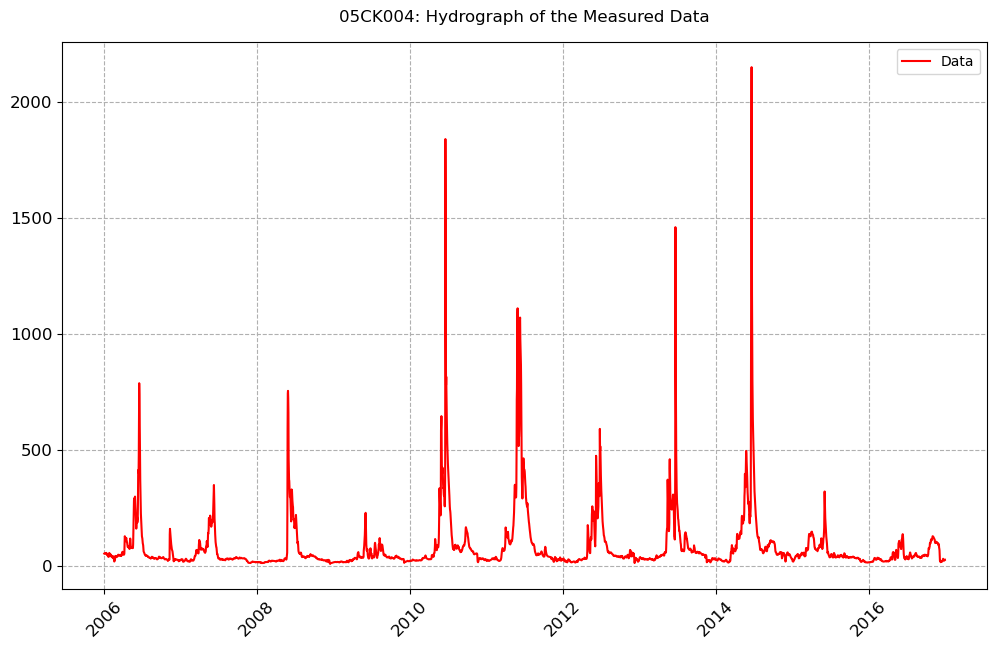

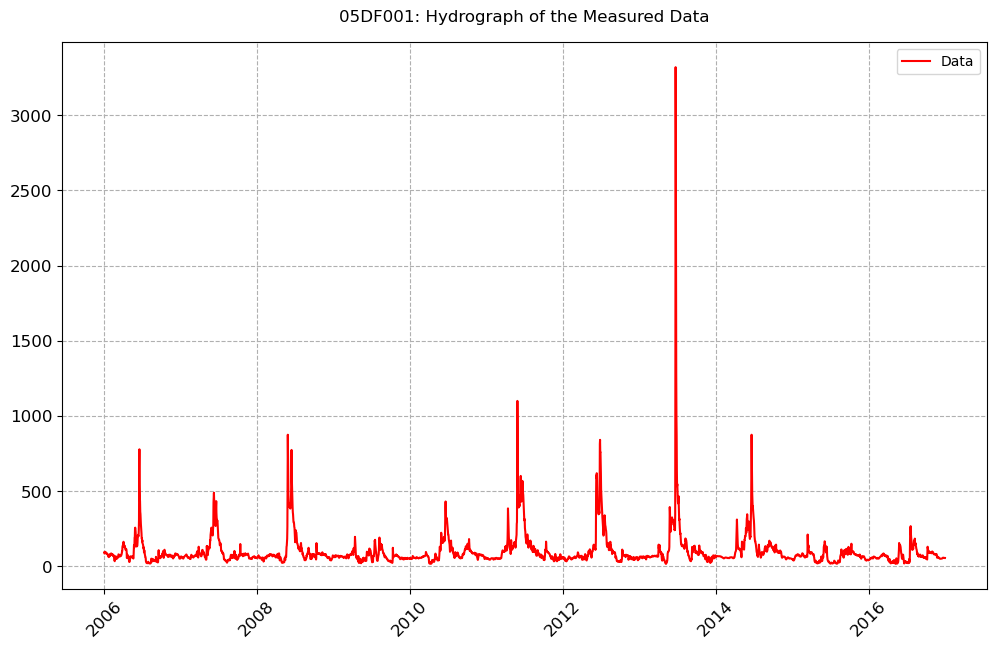

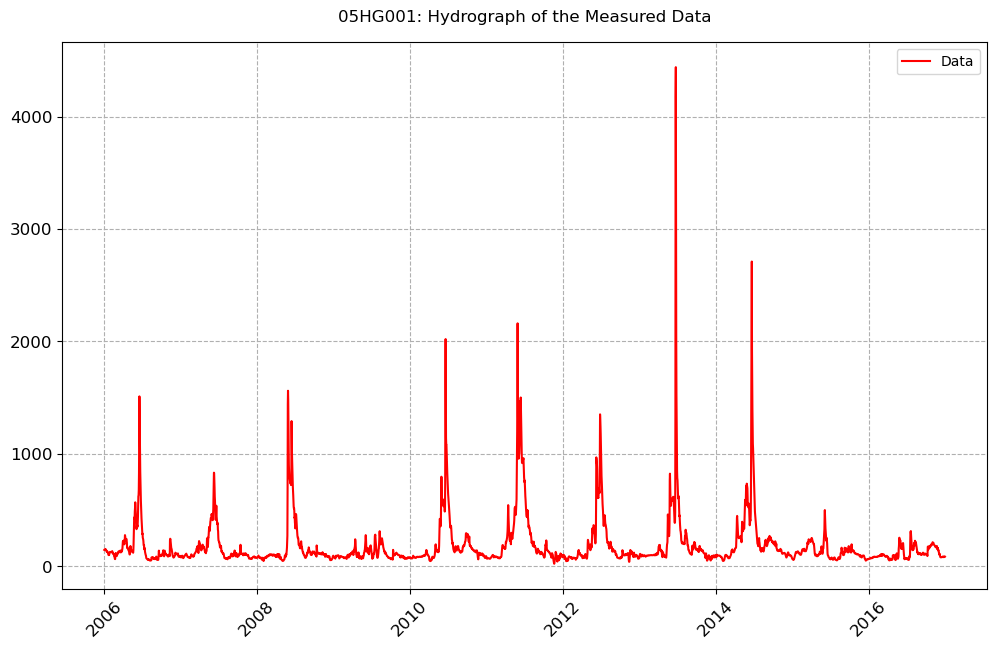

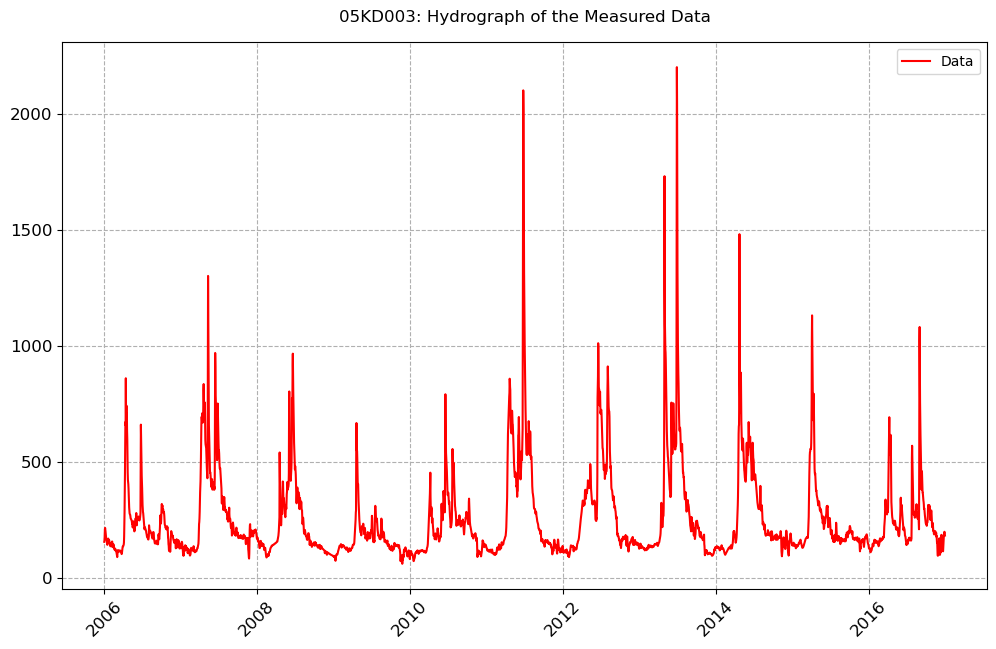

In [26]:
# A very simple line plot can be generated as shown below
# Just plotting the simulated data from the first station
visuals.plot(
    df = obs_df.loc[:, [f"QOMEAS_{col}" for col in stations_a if f"QOMEAS_{col}" in obs_df.columns]],
    title = [f"{i}: Hydrograph of the Measured Data" for i in stations_b],
    grid=True,
)

Number of simulated data columns: 12
Number of linewidths provided is less than the number of columns. Number of columns : 13. Number of linewidths provided is:  1. Defaulting to 1.5
Number of linestyles provided is less than the number of columns. Number of columns : 13. Number of linestyles provided is:  1. Defaulting to solid lines (-)
Number of legends provided is less than the number of columns. Number of columns : 13. Number of legends provided is:  1. Applying Default legend names


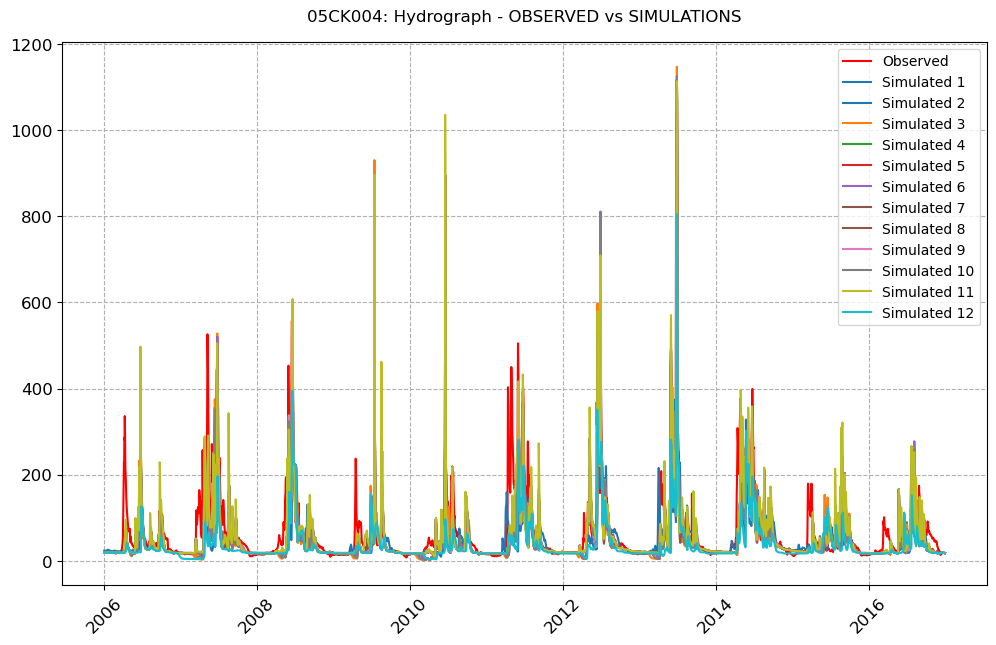

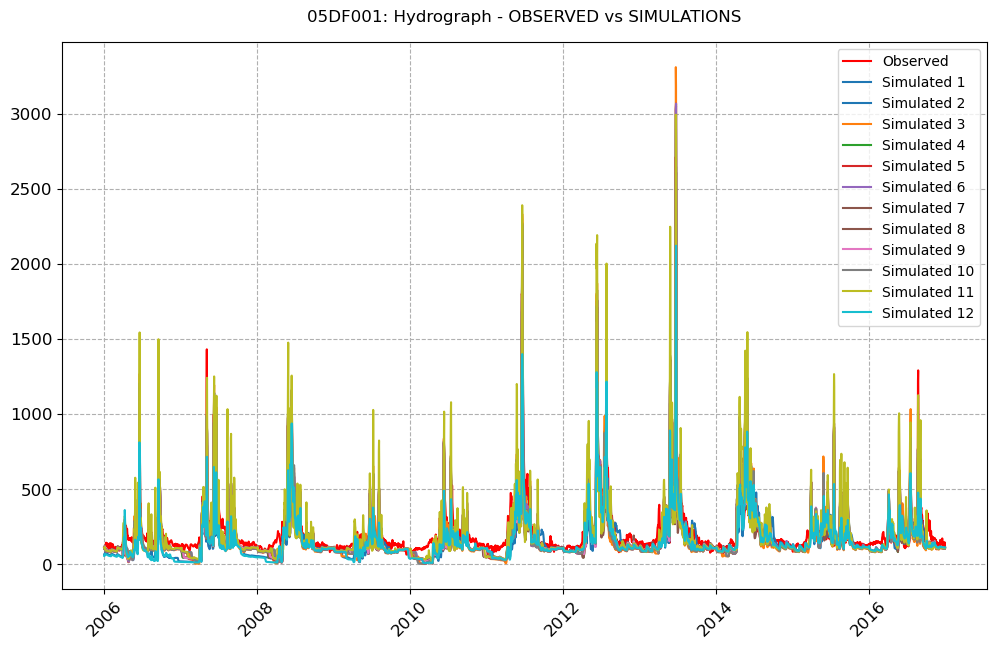

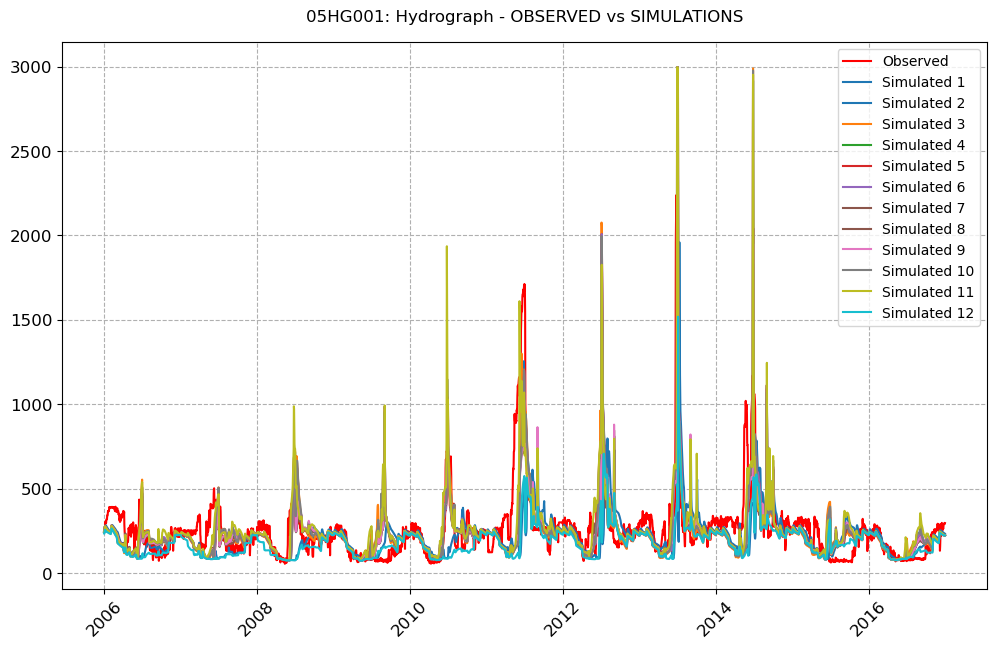

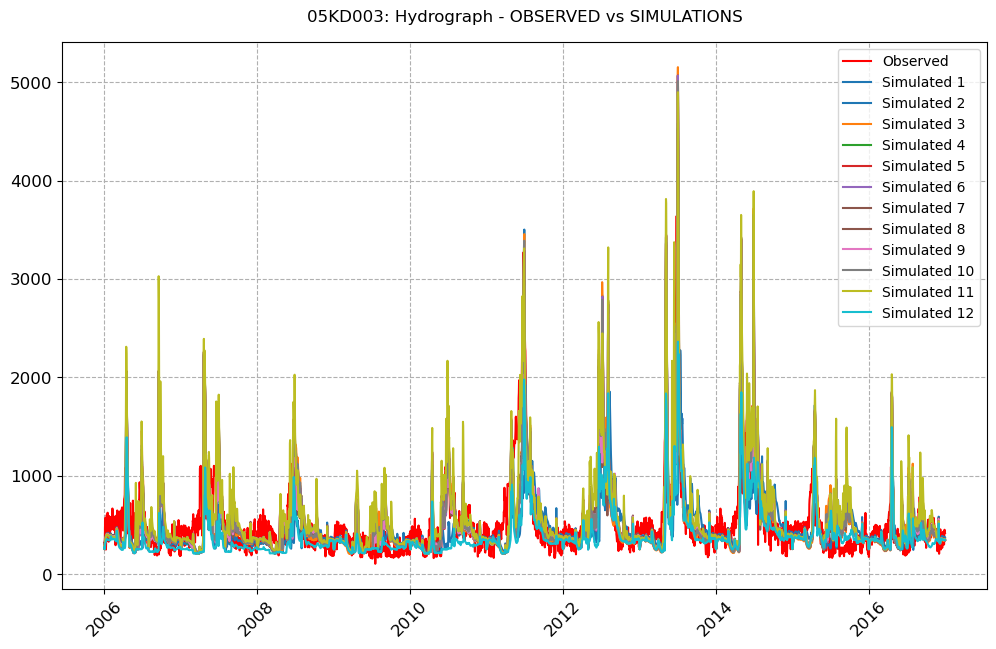

In [27]:
# Plotting both Observed and Simulated combined
visuals.plot(
    merged_df = merged_df.loc[:, [col for col in stations_b if col in merged_df.columns]],
    title = [f"{i}: Hydrograph - OBSERVED vs SIMULATIONS" for i in stations_b],
    grid=True,
)

Number of simulated data columns: 12
Number of linewidths provided is less than the number of columns. Number of columns : 13. Number of linewidths provided is:  2. Defaulting to 1.5
Number of linestyles provided is less than the number of columns. Number of columns : 13. Number of linestyles provided is:  2. Defaulting to solid lines (-)


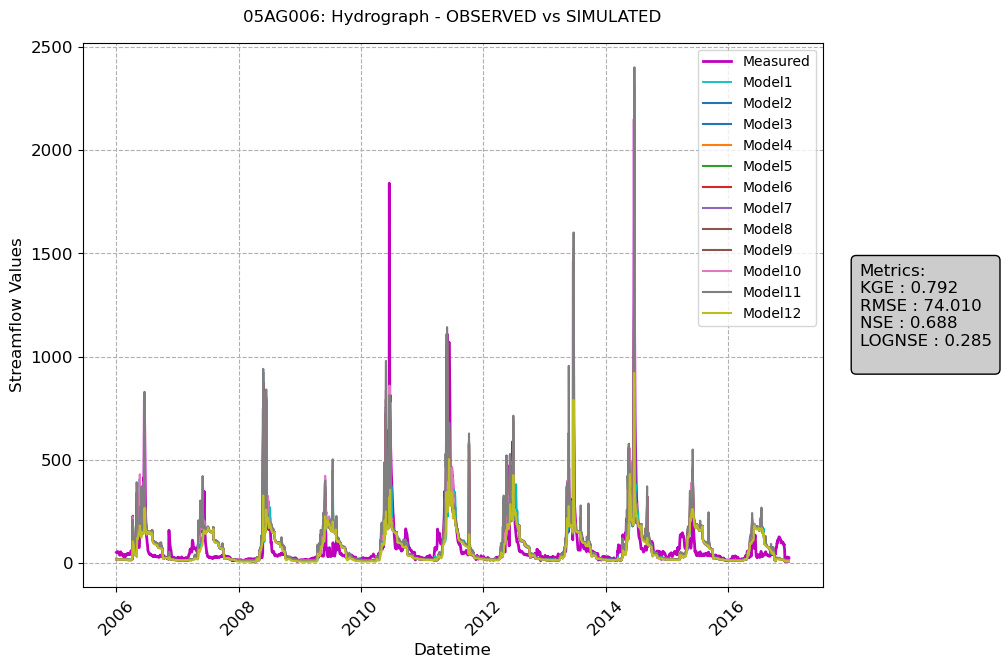

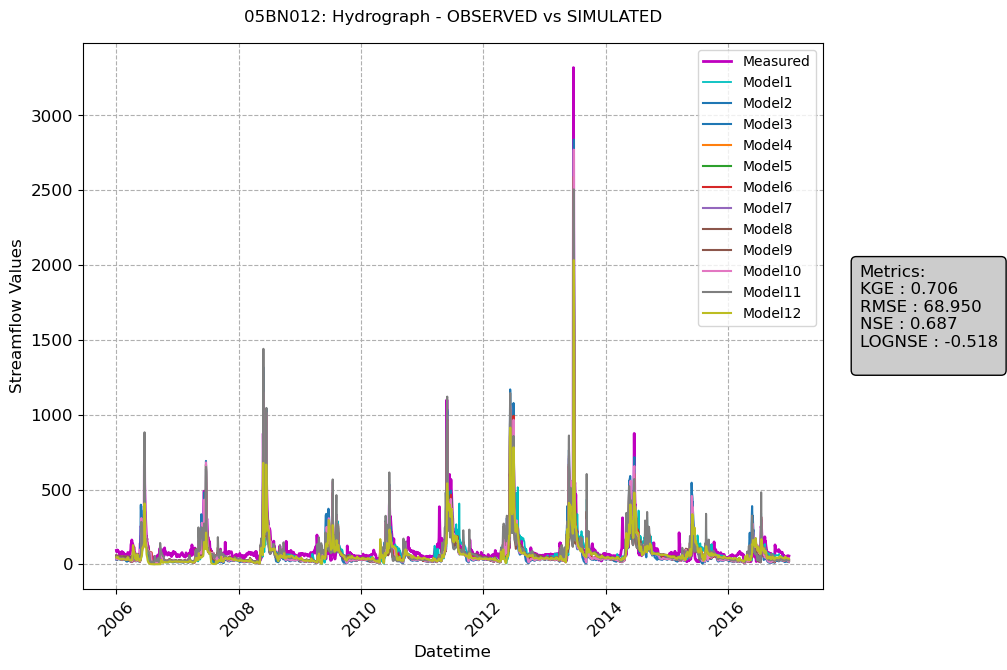

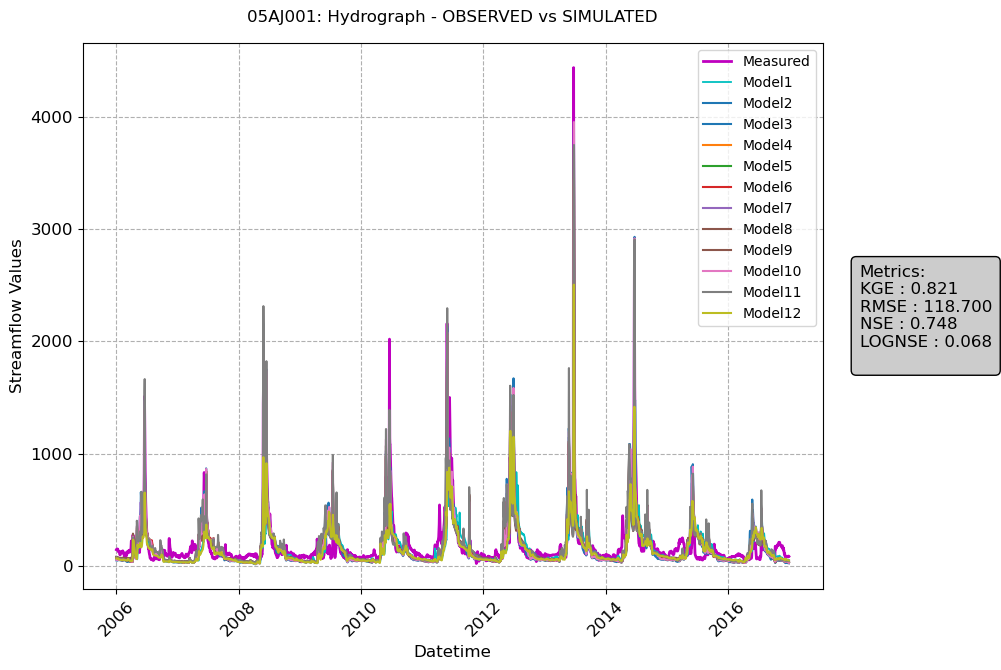

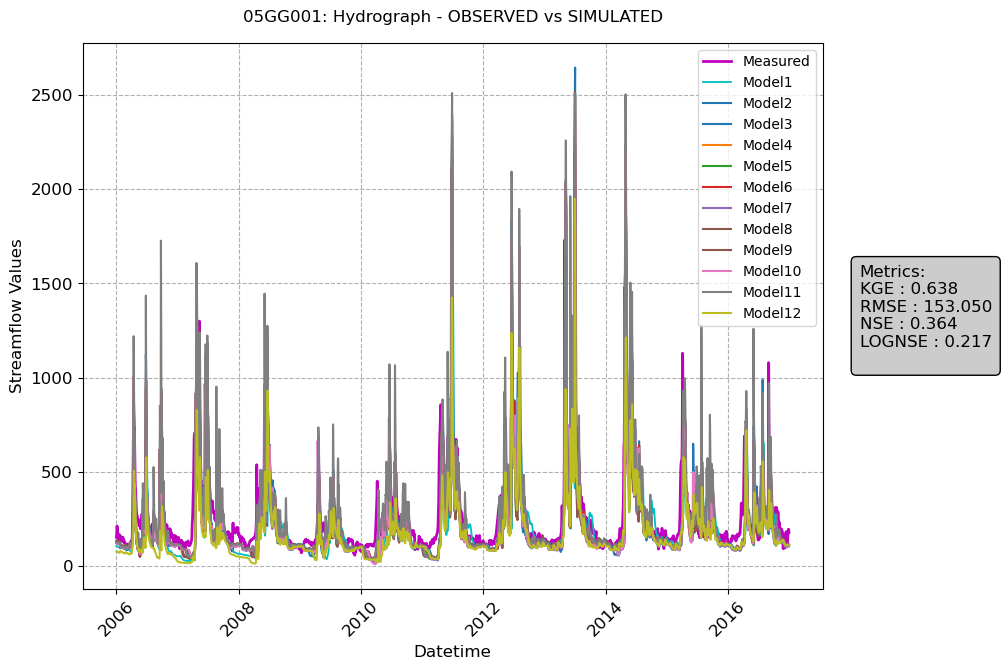

In [28]:
# Including the metrics in the plots for the 1st and 4th Stations
visuals.plot(
    merged_df = merged_df.loc[:, [col for col in stations_a if col in merged_df.columns]],
    # including multiple plot titles
    title = [f"{i}: Hydrograph - OBSERVED vs SIMULATED" for i in stations_a],
    fig_size=(10, 6),
    linestyles=('m-', 'c-'),
    labels=['Datetime', 'Streamflow Values'],
    legend = ["Measured"] + [f"Model{i}" for i in range(1, 13)],
    linewidth=(2, 1.3),
    # include metrics
    metrices = ['KGE', 'RMSE', 'NSE', 'LOGNSE'],
    grid=True,
    )

In [29]:
median = data.long_term_seasonal(df=merged_df, method = "median")
maxi = data.long_term_seasonal(df=merged_df, method = "max")
mini = data.long_term_seasonal(df=merged_df, method = "min")

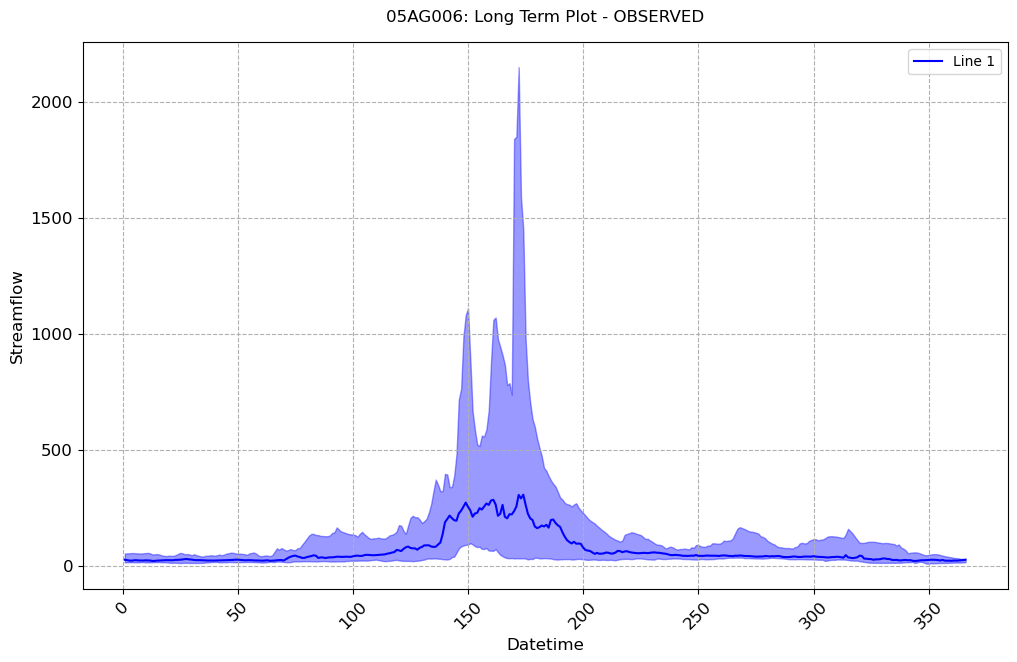

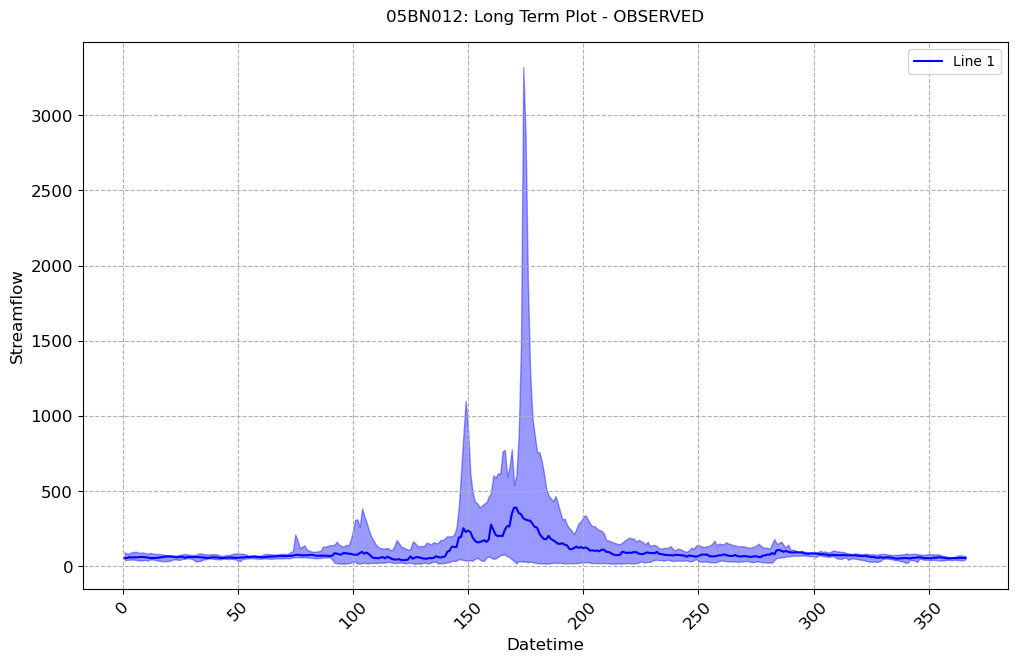

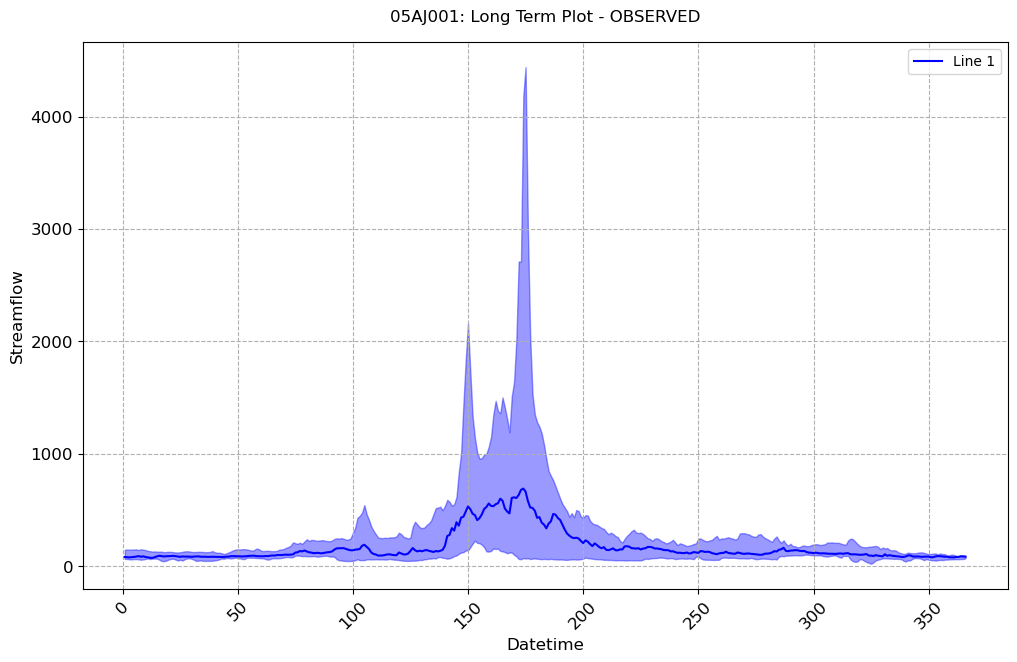

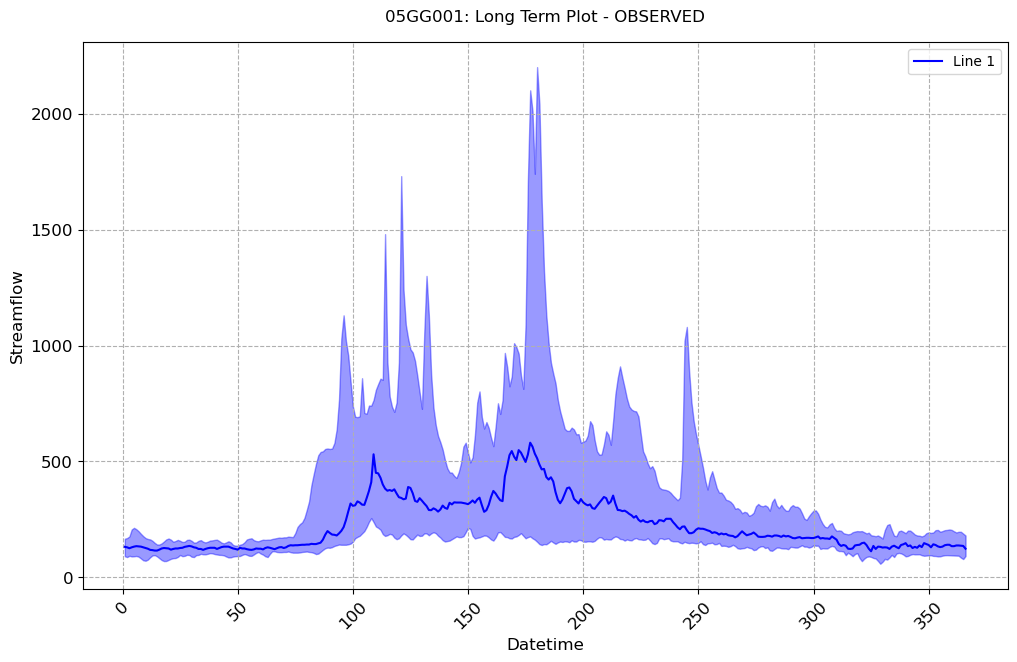

In [30]:
visuals.bounded_plot(
    lines = median.loc[:, [(col, 'QOMEAS') for col in stations_a if col in median.columns]],
    upper_bounds = [maxi.loc[:, [(col, 'QOMEAS') for col in stations_a if col in maxi.columns]]],
    lower_bounds = [mini.loc[:, [(col, 'QOMEAS') for col in stations_a if col in mini.columns]]],
    linestyles=['b-'],
    labels=['Datetime', 'Streamflow'],
    grid=True,
    transparency = [0.4, 0.3],
    title = [f"{i}: Long Term Plot - OBSERVED" for i in stations_a]
    )

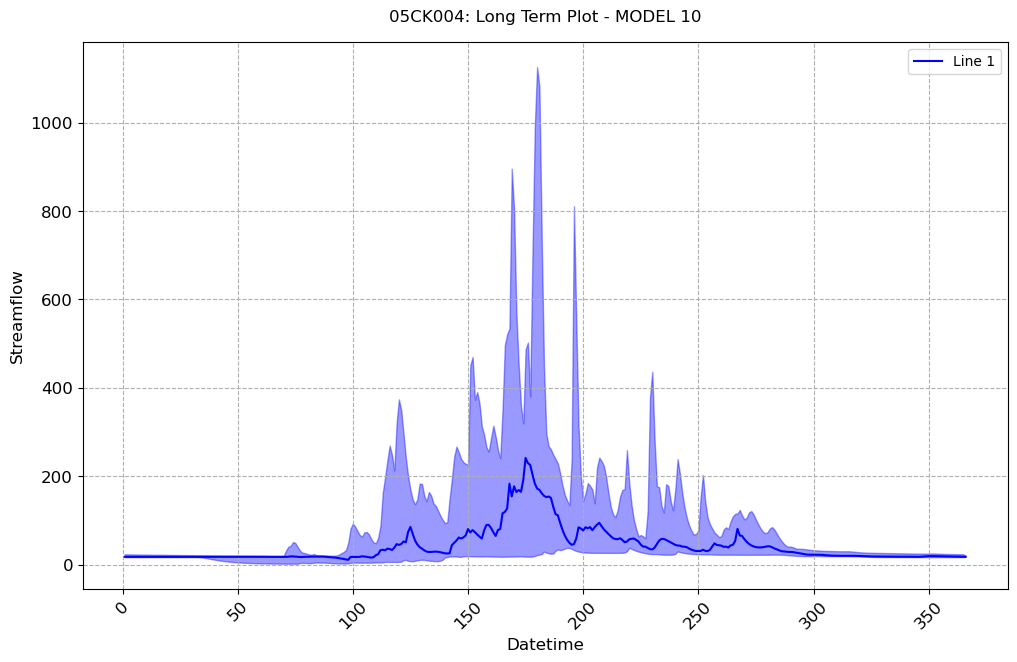

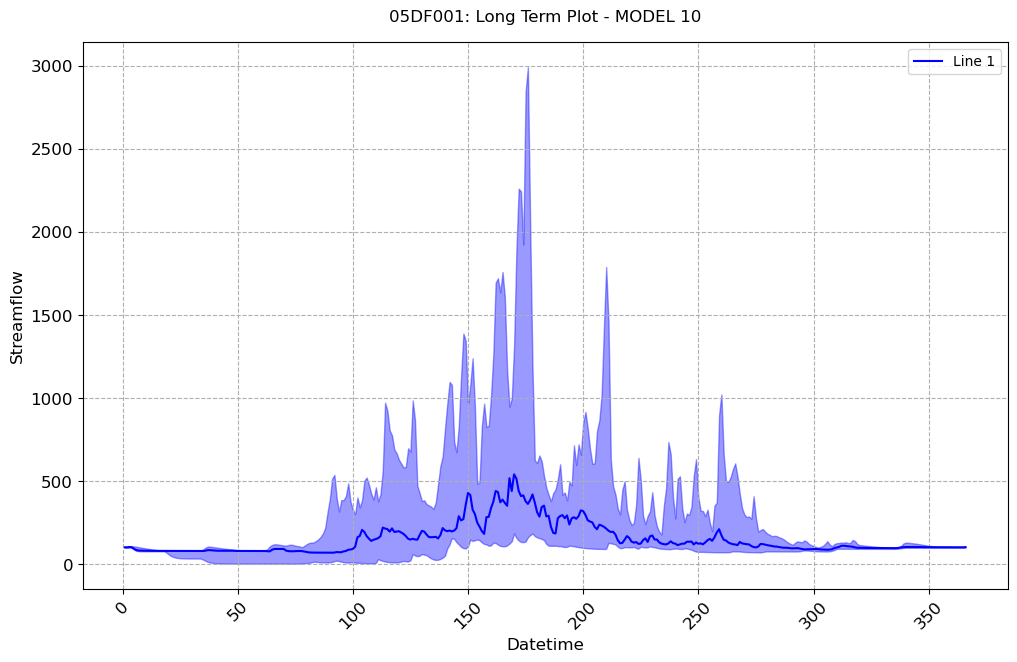

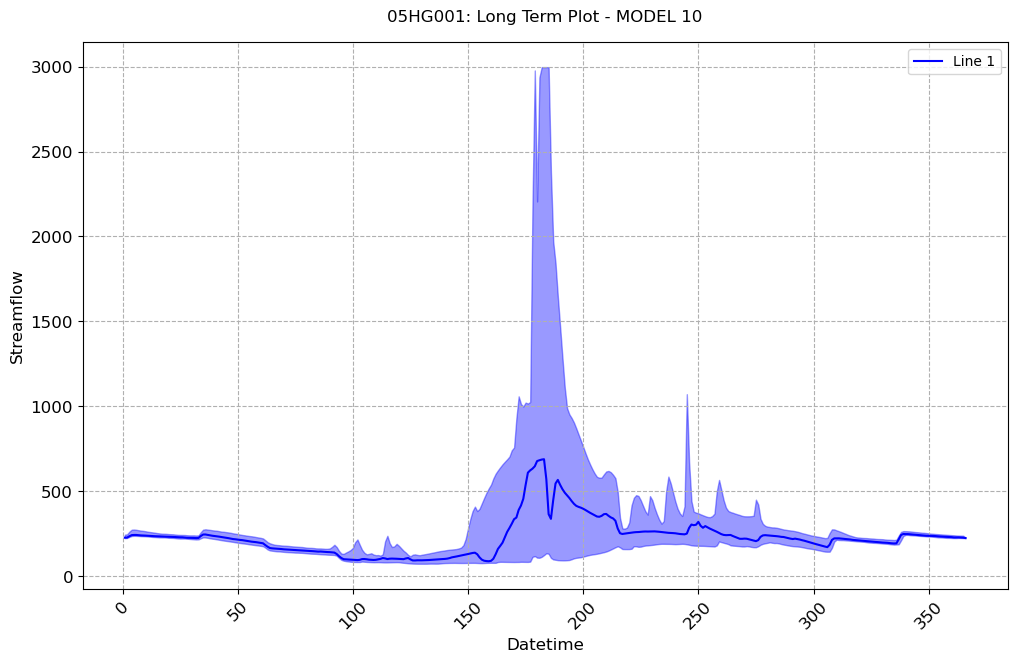

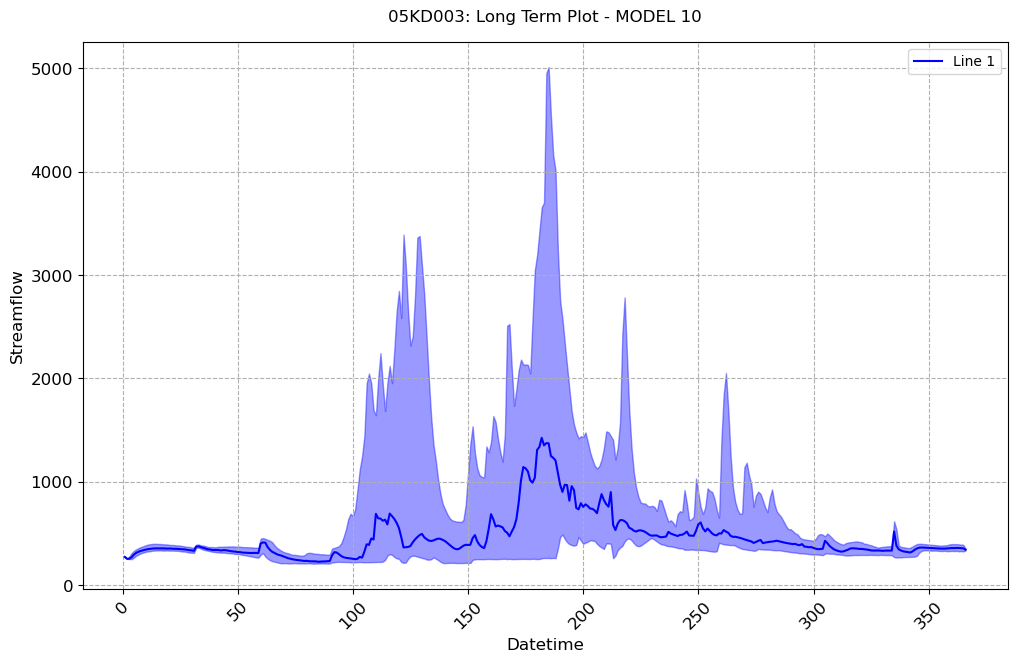

In [31]:
visuals.bounded_plot(
    lines = median.loc[:, [(col, 'QOSIM10') for col in stations_b if col in median.columns]],
    upper_bounds = [maxi.loc[:, [(col, 'QOSIM10') for col in stations_b if col in maxi.columns]]],
    lower_bounds = [mini.loc[:, [(col, 'QOSIM10') for col in stations_b if col in mini.columns]]],
    linestyles=['b-'],
    labels=['Datetime', 'Streamflow'],
    grid=True,
    transparency = [0.4, 0.3],
    title = [f"{i}: Long Term Plot - MODEL 10" for i in stations_b]
    )

Number of linestyles provided is less than the minimum required. Number of Lines : 13. Number of linestyles provided is:  2. Defaulting to solid lines (-)
Number of linewidths provided is less than the number of lines to plot. Number of lines : 13. Number of linewidths provided is:  1. Defaulting to 1.5


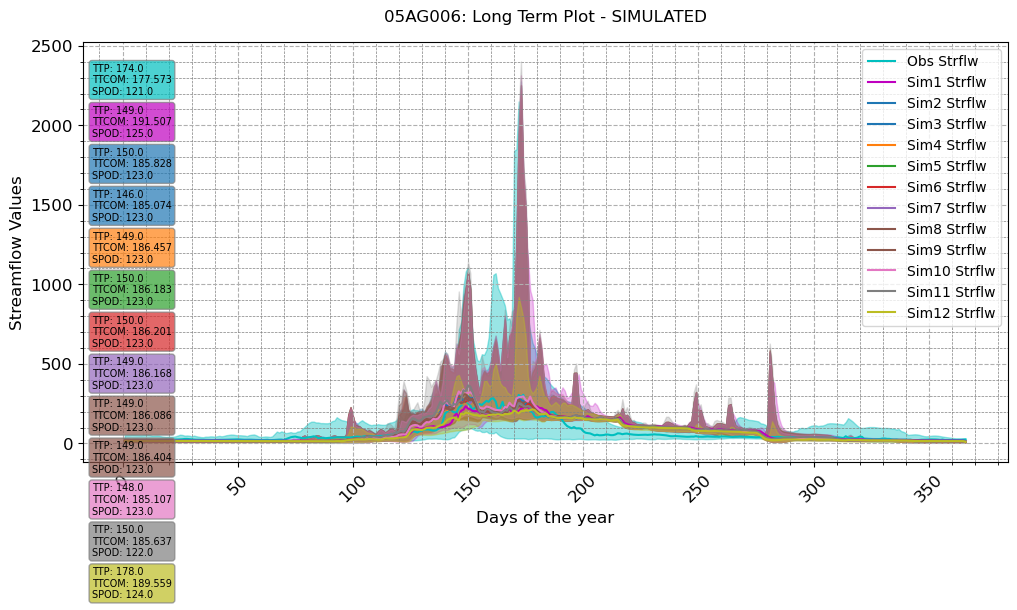

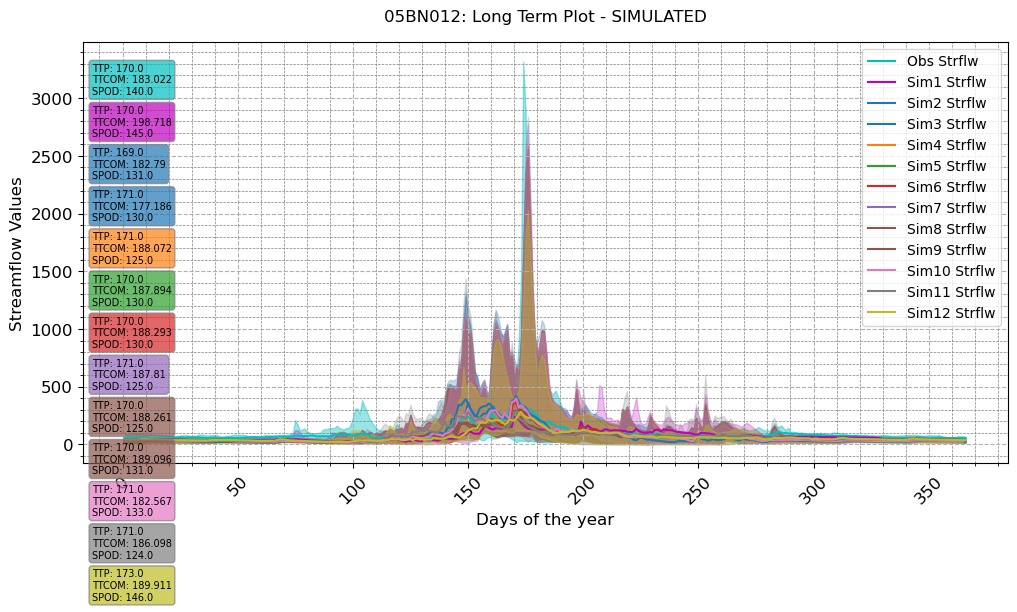

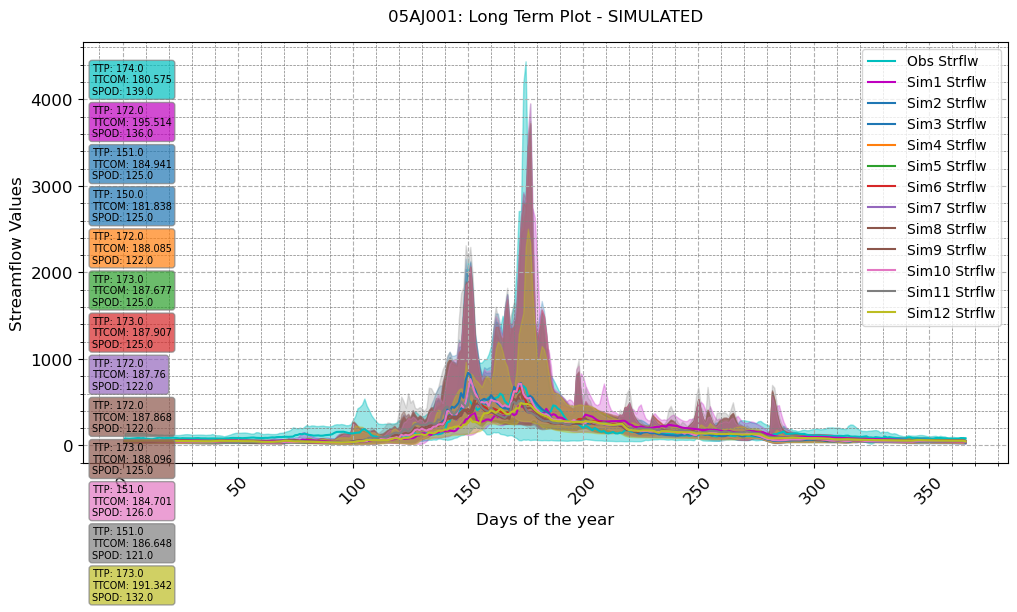

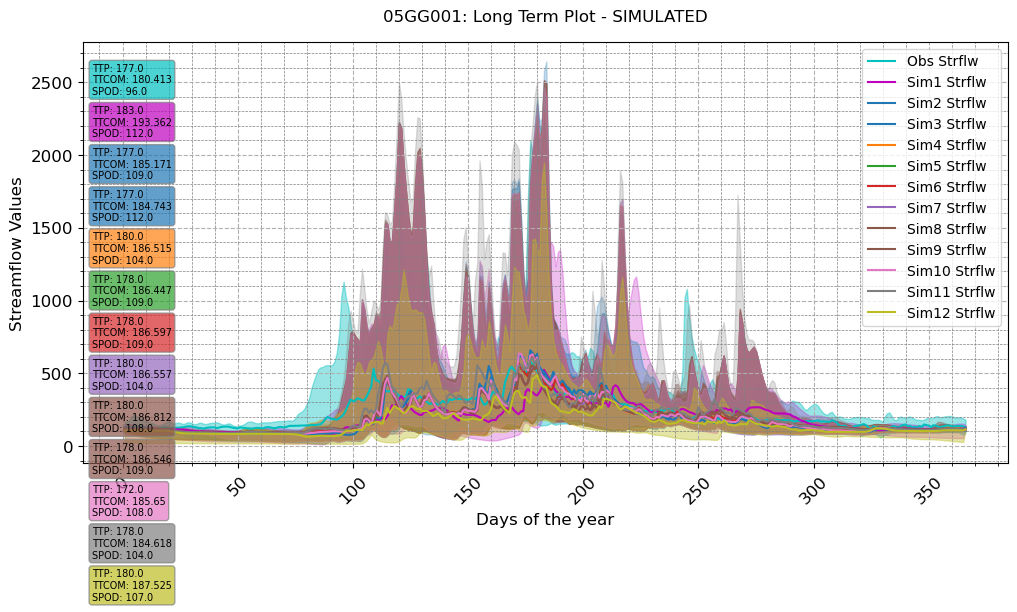

In [32]:
visuals.bounded_plot(
    lines = [median.loc[:, [(col, 'QOMEAS') for col in stations_a if (col, 'QOMEAS') in median.columns]]] + [median.loc[:, [(col, f'QOSIM{i}') for col in stations_a if (col, f'QOSIM{i}') in median.columns]] for i in range(1, 13)],
    upper_bounds = [maxi.loc[:, [(col, 'QOMEAS') for col in stations_a if (col, 'QOMEAS') in maxi.columns]]] +  [maxi.loc[:, [(col, f'QOSIM{i}') for col in stations_a if (col, f'QOSIM{i}') in maxi.columns]] for i in range(1, 13)],
    lower_bounds = [mini.loc[:, [(col, 'QOMEAS') for col in stations_a if (col, 'QOMEAS') in mini.columns]]] + [mini.loc[:, [(col, f'QOSIM{i}') for col in stations_a if (col, f'QOSIM{i}') in mini.columns]] for i in range(1, 13)],
    legend = ['Obs Strflw'] + [f'Sim{i} Strflw' for i in range(1, 13)],
    linestyles=('c-', 'm-'),
    labels=['Days of the year', 'Streamflow Values'],
    transparency = [0.4, 0.25],
    metrices=["TTP", "TTCOM", "SPOD"],
    title = [f"{i}: Long Term Plot - SIMULATED" for i in stations_a],
    grid = True, minor_grid = True, text_size=7
    )

Number of linestyles provided is less than the minimum required. Number of Lines : 13. Number of linestyles provided is:  2. Defaulting to solid lines (-)
Number of linewidths provided is less than the number of lines to plot. Number of lines : 13. Number of linewidths provided is:  1. Defaulting to 1.5


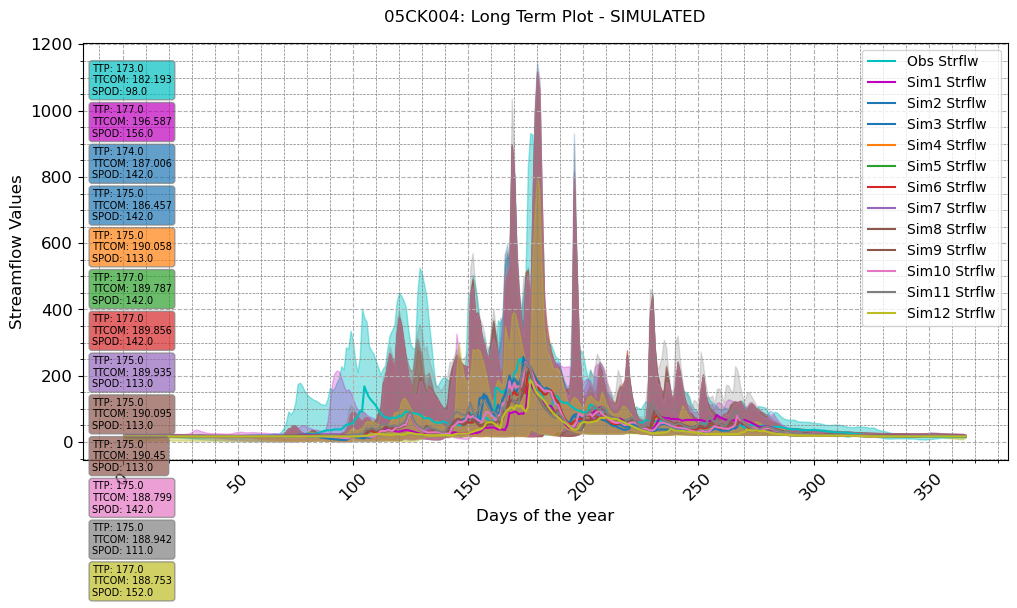

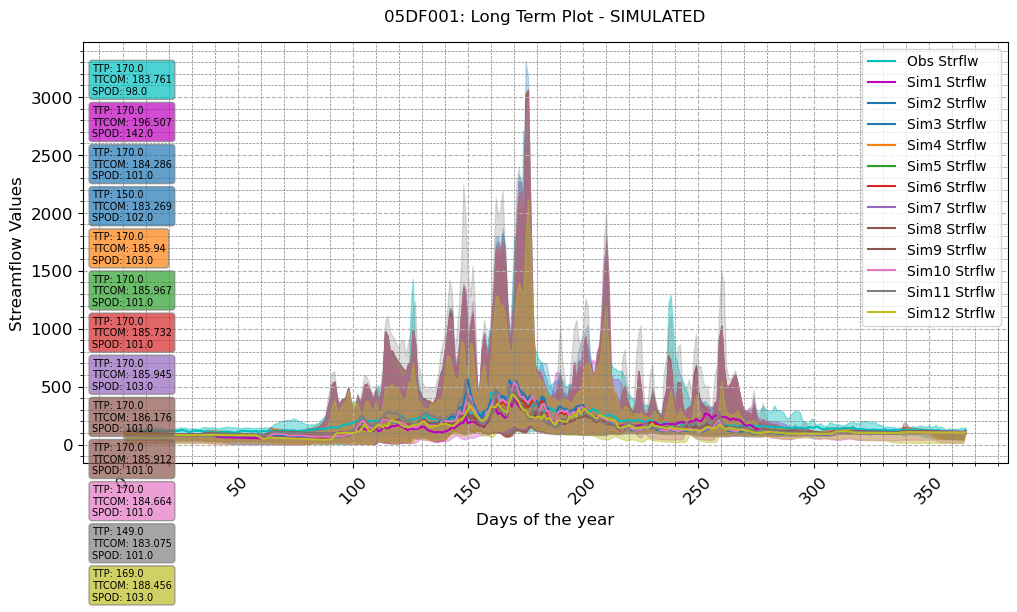

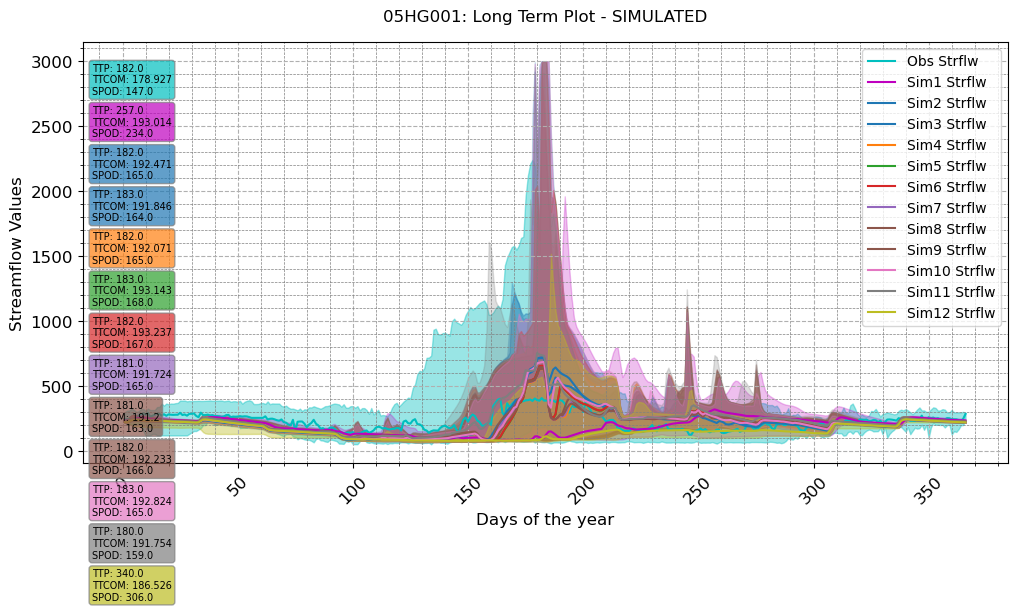

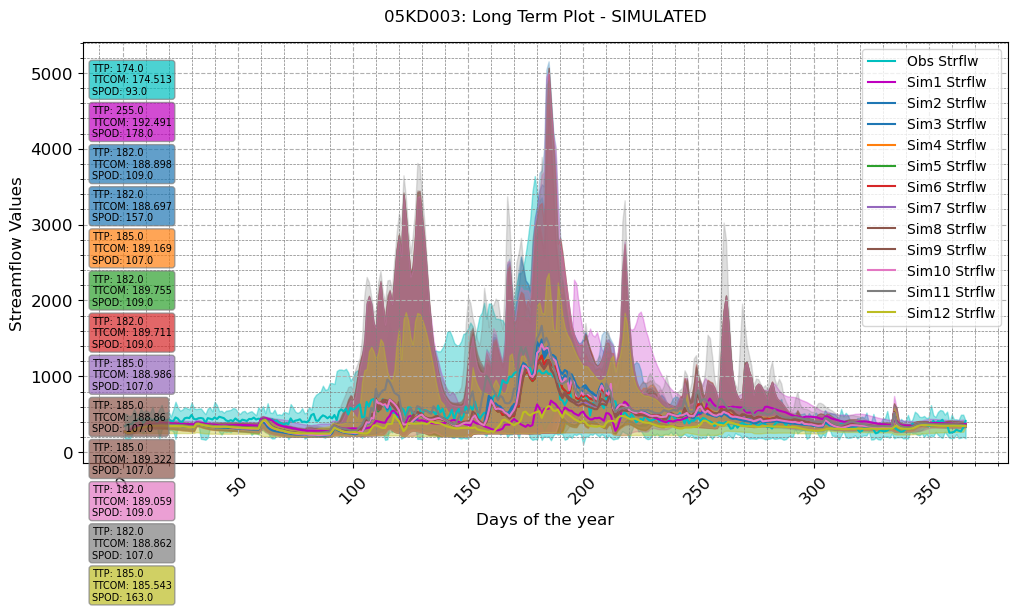

In [33]:
visuals.bounded_plot(
    lines = [median.loc[:, [(col, 'QOMEAS') for col in stations_b if (col, 'QOMEAS') in median.columns]]] + [median.loc[:, [(col, f'QOSIM{i}') for col in stations_b if (col, f'QOSIM{i}') in median.columns]] for i in range(1, 13)],
    upper_bounds = [maxi.loc[:, [(col, 'QOMEAS') for col in stations_b if (col, 'QOMEAS') in maxi.columns]]] +  [maxi.loc[:, [(col, f'QOSIM{i}') for col in stations_b if (col, f'QOSIM{i}') in maxi.columns]] for i in range(1, 13)],
    lower_bounds = [mini.loc[:, [(col, 'QOMEAS') for col in stations_b if (col, 'QOMEAS') in mini.columns]]] + [mini.loc[:, [(col, f'QOSIM{i}') for col in stations_b if (col, f'QOSIM{i}') in mini.columns]] for i in range(1, 13)],
    legend = ['Obs Strflw'] + [f'Sim{i} Strflw' for i in range(1, 13)],
    linestyles=('c-', 'm-'),
    labels=['Days of the year', 'Streamflow Values'],
    transparency = [0.4, 0.25],
    metrices=["TTP", "TTCOM", "SPOD"],
    title = [f"{i}: Long Term Plot - SIMULATED" for i in stations_b],
    grid = True, minor_grid = True, text_size=7
    )

Number of simulated data columns: 12
Number of markerstyles provided is less than the number of columns. Number of columns : 12. Number of markerstyles provided is:  1. Using Default Markerstyles.


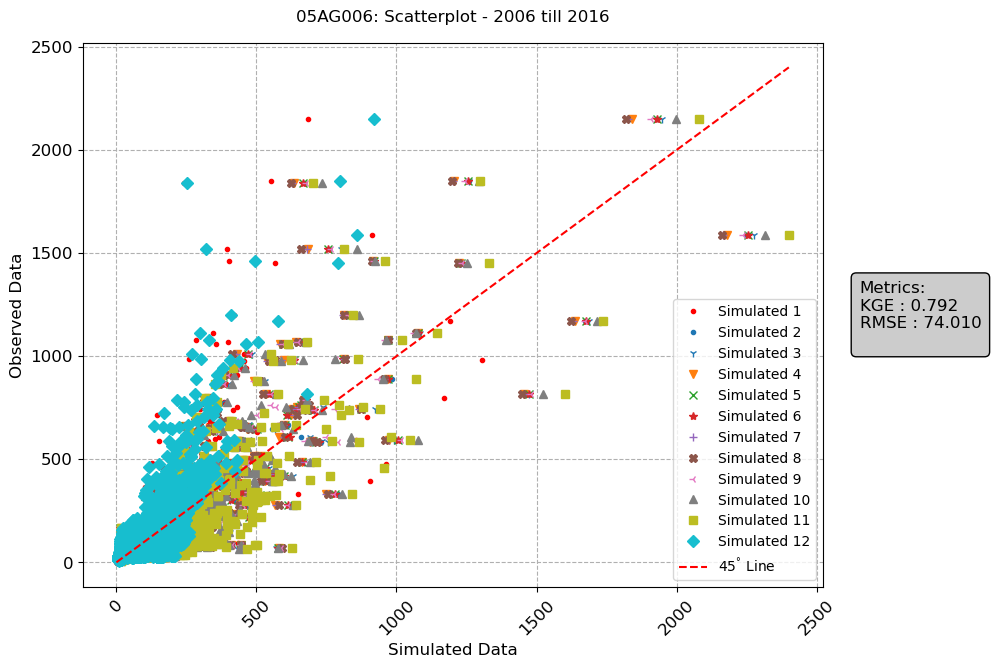

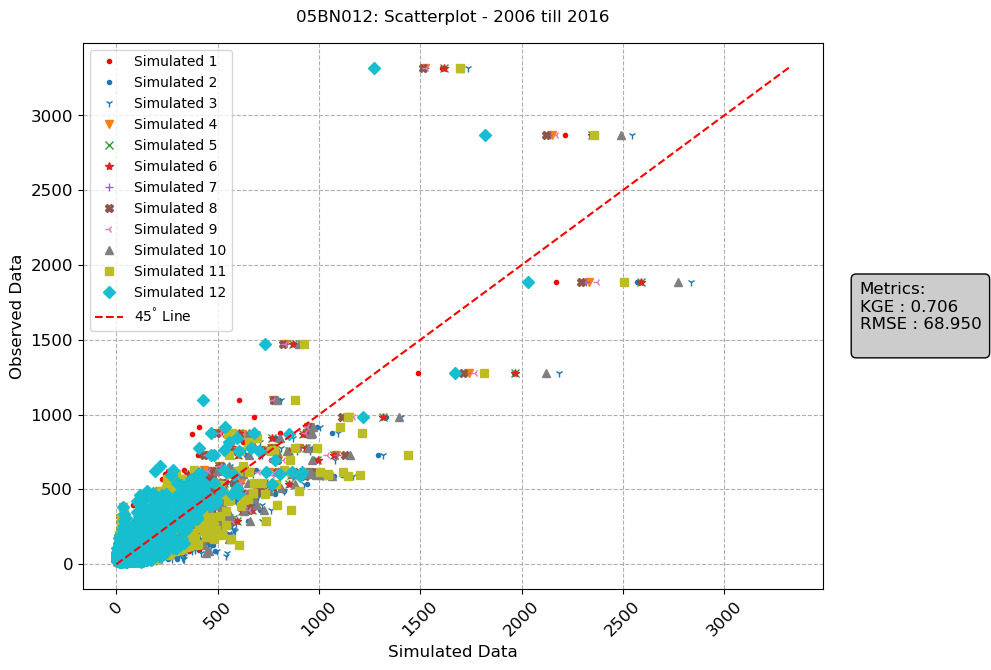

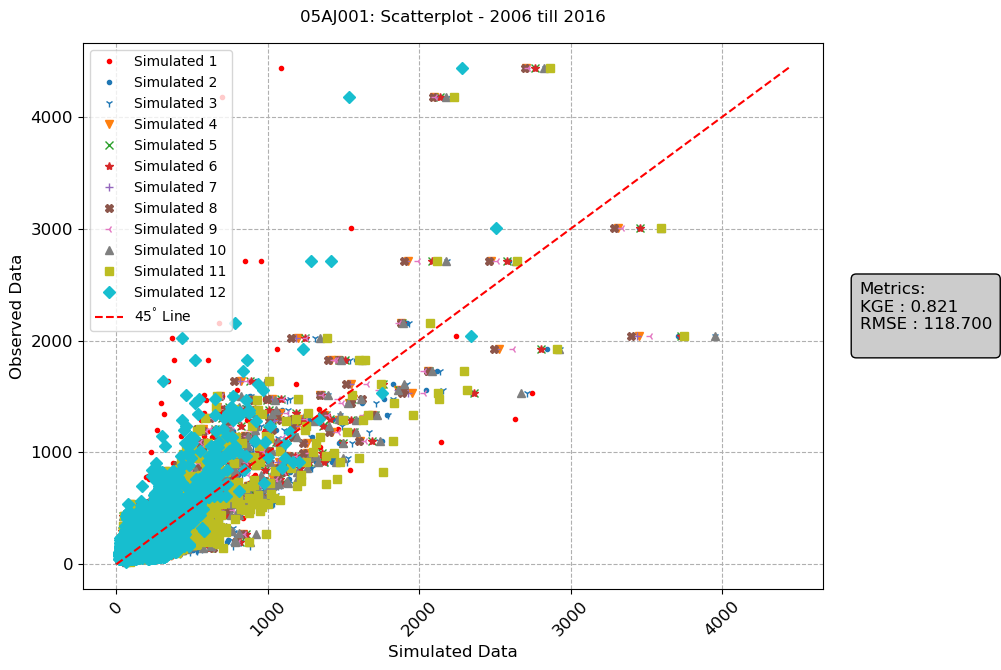

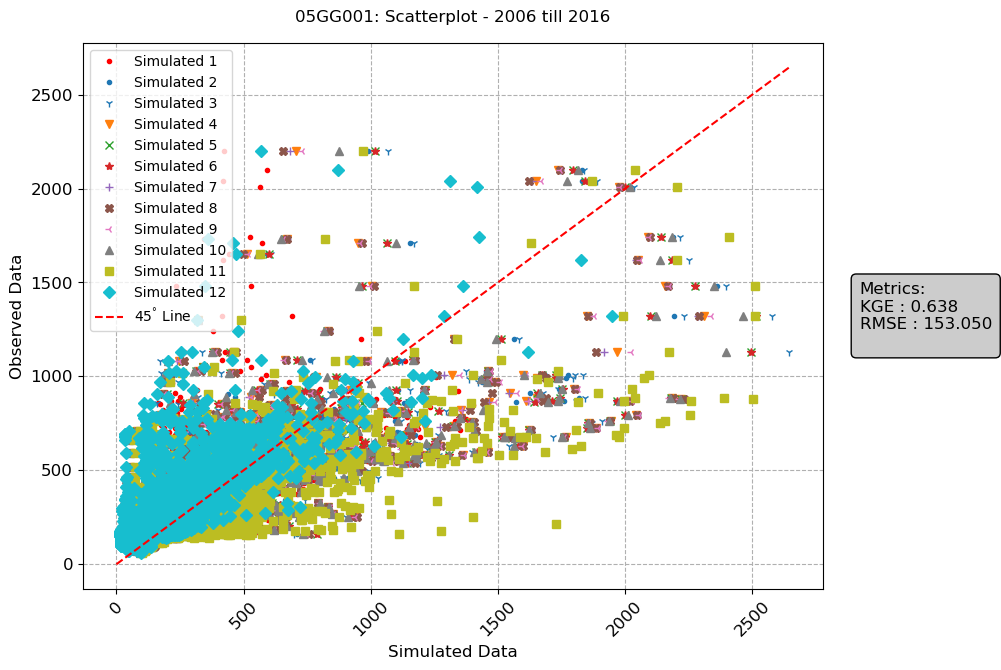

In [34]:
visuals.scatter(merged_df = merged_df.loc[:, [col for col in stations_a if col in merged_df.columns]],
               grid = True,
               labels = ("Simulated Data", "Observed Data"),
               markerstyle = ['r.'],
               title = [f"{i}: Scatterplot - 2006 till 2016" for i in stations_a],
               line45 = True,
               metrices = ['KGE', 'RMSE'],
               )

C:\Users\udenzeU\Desktop\JUPYTER\postprocessing\docs\source\notebooks\../../..\postprocessinglib\evaluation\visuals.py:242: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


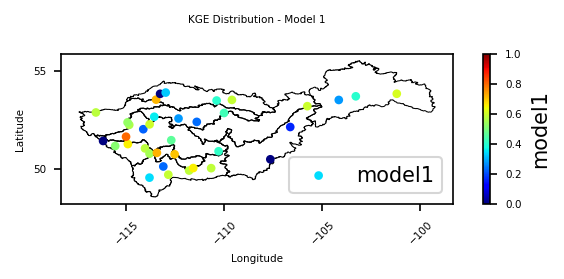

C:\Users\udenzeU\Desktop\JUPYTER\postprocessing\docs\source\notebooks\../../..\postprocessinglib\evaluation\visuals.py:242: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


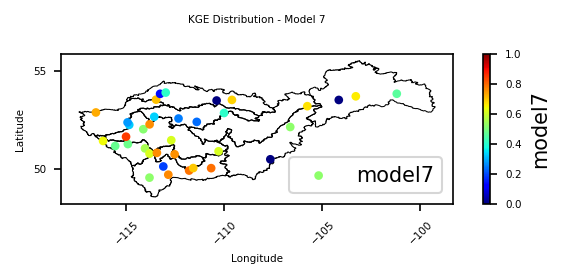

C:\Users\udenzeU\Desktop\JUPYTER\postprocessing\docs\source\notebooks\../../..\postprocessinglib\evaluation\visuals.py:242: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


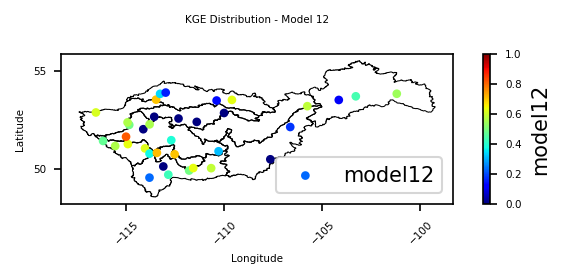

In [35]:
shapefile_path = r"SaskRB_SubDrainage2.shp"

visuals.scatter(shapefile_path = shapefile_path,
    title = [f"KGE Distribution - Model {i}" for i in [1, 7, 12]],
    x_axis = Stations["Lon"],
    y_axis = Stations["Lat"],
    metric = "KGE",
    fig_size = (10, 10),
    font_size=5, 
    markersize=10,
    text_size = 8,
    observed = DATAFRAMES["DF_OBSERVED"],
    simulated = simulated_list,
    labels=['Longitude', 'Latitude'],
    mode = "models", # Shows metric plots of individual models
    models = ["model1", "model7", "model12"],
    vmin = 0,
    vmax=1,
)

C:\Users\udenzeU\Desktop\JUPYTER\postprocessing\docs\source\notebooks\../../..\postprocessinglib\evaluation\visuals.py:242: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


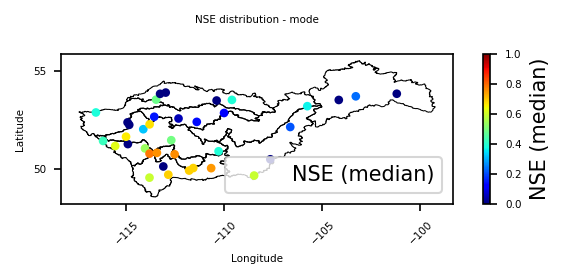

In [36]:
shapefile_path = r"SaskRB_SubDrainage2.shp"

visuals.scatter(shapefile_path = shapefile_path,
    title = "NSE distribution - mode",
    x_axis = Stations["Lon"],
    y_axis = Stations["Lat"],
    metric = "NSE",
    fig_size = (10, 10),
    font_size=5, 
    markersize=10,
    observed = DATAFRAMES["DF_OBSERVED"],
    simulated = simulated_list, 
    ## mode Defaults to median thus returning the median KGE accross all models
    labels=['Longitude', 'Latitude'],
    vmin = 0,
    vmax=1,
)

C:\Users\udenzeU\Desktop\JUPYTER\postprocessing\docs\source\notebooks\../../..\postprocessinglib\evaluation\visuals.py:242: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


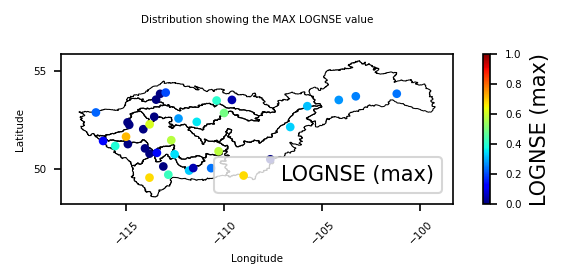

In [37]:
shapefile_path = r"SaskRB_SubDrainage2.shp"

visuals.scatter(shapefile_path = shapefile_path,
    title = "Distribution showing the MAX LOGNSE value",
    x_axis = Stations["Lon"],
    y_axis = Stations["Lat"],
    metric = "LOGNSE",
    fig_size = (10, 10),
    font_size=5, 
    markersize=10,
    text_size = 12,
    observed = DATAFRAMES["DF_OBSERVED"],
    simulated = simulated_list,
    labels=['Longitude', 'Latitude'],
    mode = "max",
    vmin = 0,
    vmax=1,
)

In [42]:
visuals.histogram(
    merged_df = merged_df.loc[:, [col for col in stations_a if col in merged_df.columns]],
    grid = True,
    title = [f"{i}: Histogram - 2006 till 2016" for i in stations_a],
)

Number of simulated data columns: 1


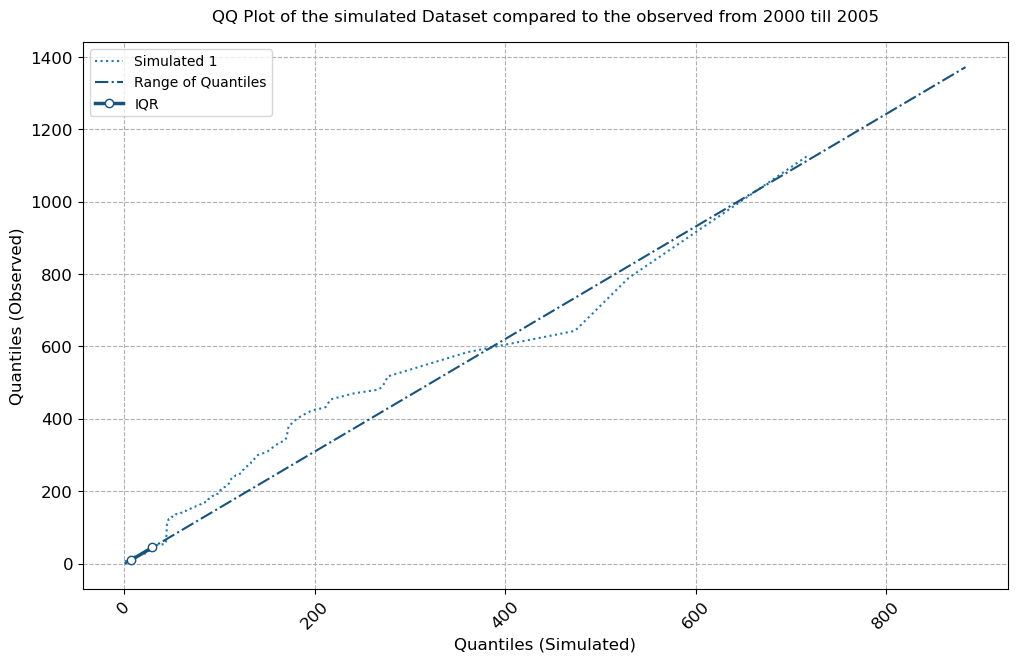

In [39]:
visuals.qqplot(
    merged_df =DATAFRAMES["DF_MERGED"].iloc[:, [0, 1]],
    labels=["Quantiles (Simulated)", "Quantiles (Observed)"],
    title="QQ Plot of the simulated Dataset compared to the observed from 2000 till 2005",
    grid = True
)

Number of simulated data columns: 1
Number of linewidths provided is less than the number of columns. Number of columns : 2. Number of linewidths provided is:  1. Defaulting to 1.5
Number of linestyles provided is less than the number of columns. Number of columns : 2. Number of linestyles provided is:  1. Defaulting to solid lines (-)
Number of legends provided is less than the number of columns. Number of columns : 2. Number of legends provided is:  1. Applying Default legend names


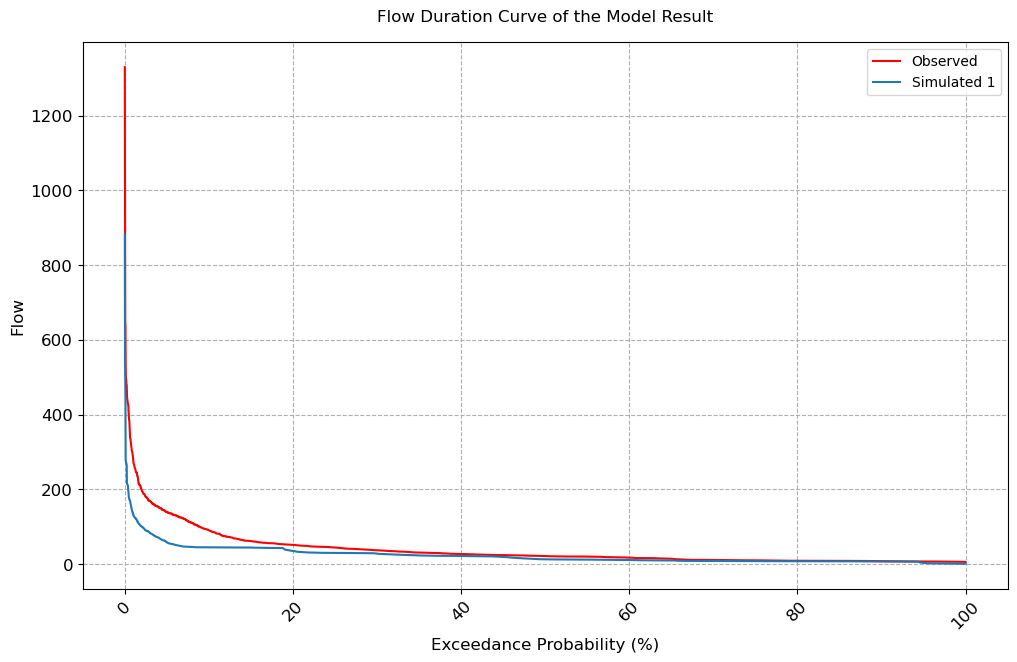

In [40]:
visuals.flow_duration_curve(
    merged_df = DATAFRAMES["DF_MERGED"].iloc[:, [0, 1]],
    title='Flow Duration Curve of the Model Result',
    grid = True
)